## Insurance Claims- Fraud Detection
### Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [110]:
ic=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [111]:
pd.set_option('display.max_columns',None)

In [112]:
ic.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [113]:
ic.shape

(1000, 40)

In [114]:
ic.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [115]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [116]:
ic.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

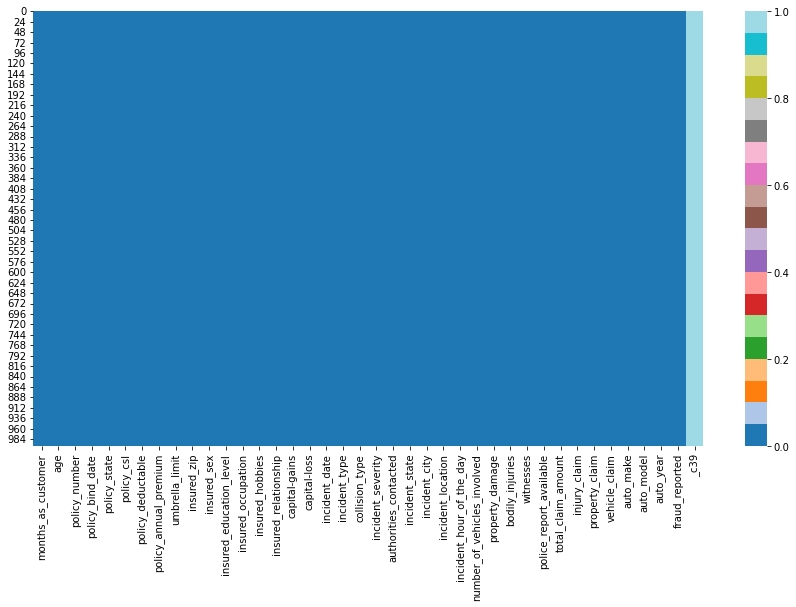

In [117]:
plt.figure(figsize=[15,8])
sns.heatmap(ic.isnull(),cmap='tab20')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is 1000 * 40 i.e. no. of rows are 1000 and no. of columns are 40(including target).

2) Out of 40 columns 19 columns are continuous in nature and rest 21 are object type.

3) Null values are present in only one column named _c39 as we can see in ths seaborn heatmap.So we will drop this column.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset.

## Univariate analysis

['Y' 'N']


N    753
Y    247
Name: fraud_reported, dtype: int64


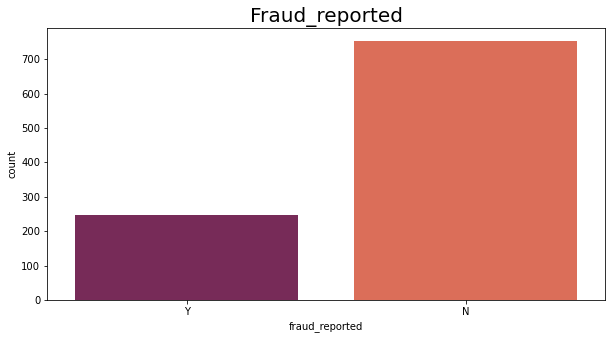

In [118]:
print(ic['fraud_reported'].unique())
print('\n')
print(ic['fraud_reported'].value_counts())
plt.figure(figsize=[10,5])
plt.title('Fraud_reported',fontsize=20)
sns.countplot(ic['fraud_reported'],palette='rocket')
plt.show()

Unique values : 
[2004 2007 2014 2009 2003 2012 2015 1996 2002 2006 2000 2010 1999 2011
 2005 2008 1995 2001 1998 1997 2013]




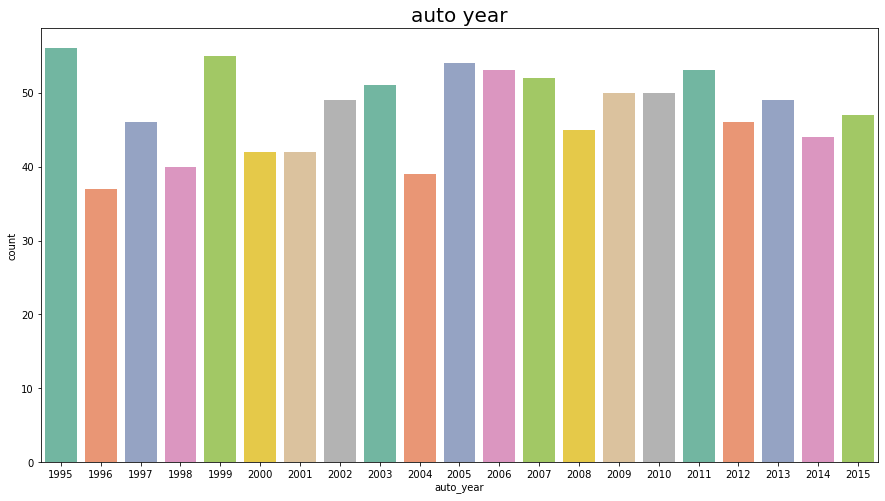

In [119]:
print("Unique values : ")
print(ic['auto_year'].unique())
print('\n')
plt.figure(figsize=[15,8])
plt.title('auto year',fontsize=20)
sns.countplot(ic['auto_year'],palette='Set2')
plt.show()

Unique values : 
['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']




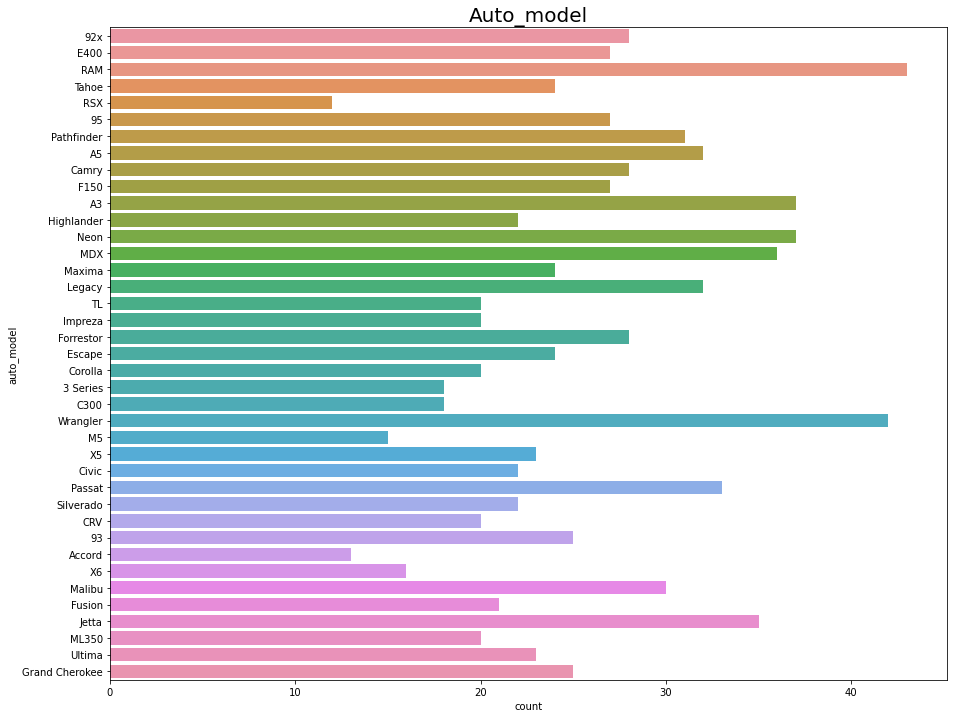

In [120]:
print("Unique values : ")
print(ic['auto_model'].unique())
print('\n')
plt.figure(figsize=[15,12])
plt.title('Auto_model',fontsize=20)
sns.countplot(y=ic['auto_model'])
plt.show()

Unique values : 
[48 42 29 41 44 39 34 37 33 61 23 38 58 26 31 62 55 40 35 43 45 25 30 28
 49 54 47 59 27 56 32 36 64 60 51 46 50 57 53 24 52 19 21 63 20 22]




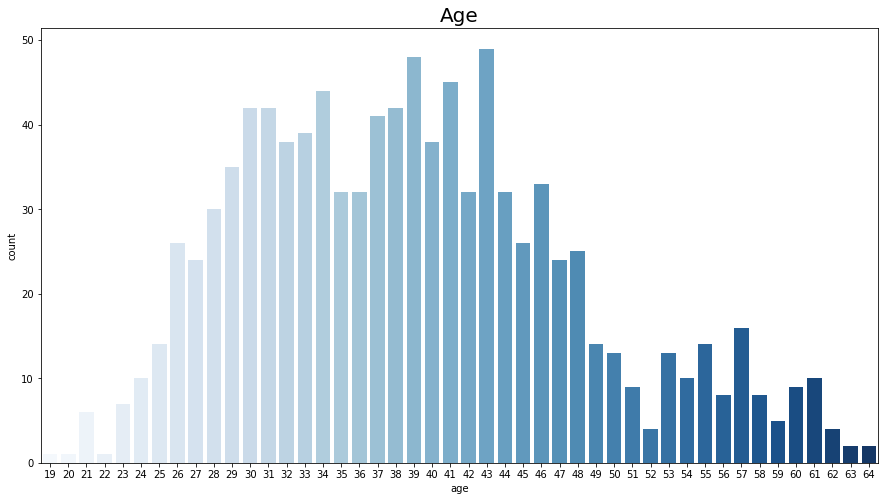

In [121]:
print("Unique values : ")
print(ic['age'].unique())
print('\n')
plt.figure(figsize=[15,8])
plt.title('Age',fontsize=20)
sns.countplot(ic['age'],palette='Blues')
plt.show()

Unique values : 


Text(0.5, 1.0, 'Policy_state')

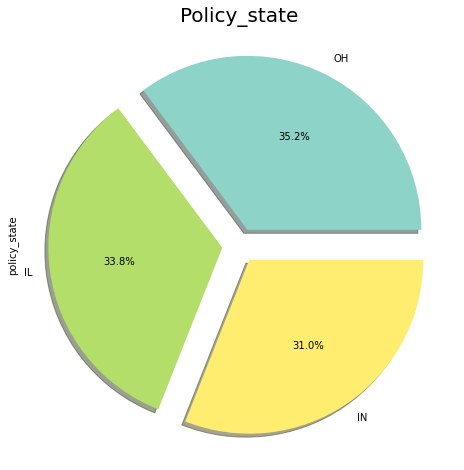

In [122]:
print("Unique values : ")
ic.policy_state.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct="%1.1f%%",cmap='Set3')
plt.title('Policy_state',fontsize=20)

Unique values : 
[       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]




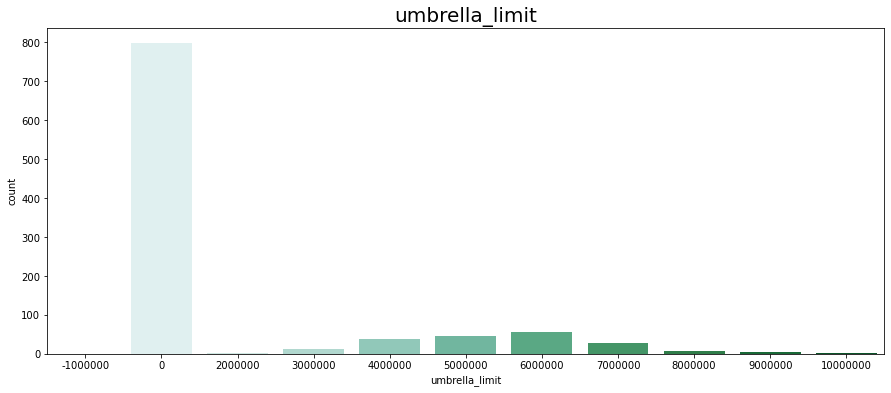

In [123]:
print("Unique values : ")
print(ic['umbrella_limit'].unique())
print('\n')
plt.figure(figsize=[15,6])
plt.title('umbrella_limit',fontsize=20)
sns.countplot(ic['umbrella_limit'],palette='BuGn')
plt.show()

Unique values : 
['MALE' 'FEMALE']




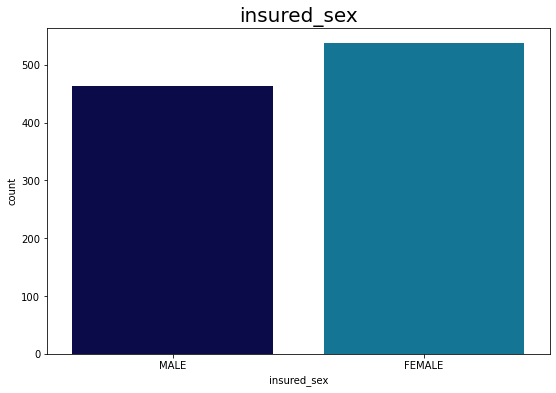

In [124]:
print("Unique values : ")
print(ic['insured_sex'].unique())
print('\n')
plt.figure(figsize=[9,6])
plt.title('insured_sex',fontsize=20)
sns.countplot(ic['insured_sex'],palette='ocean')
plt.show()

Unique values : 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


Text(0.5, 1.0, 'insured_education_level')

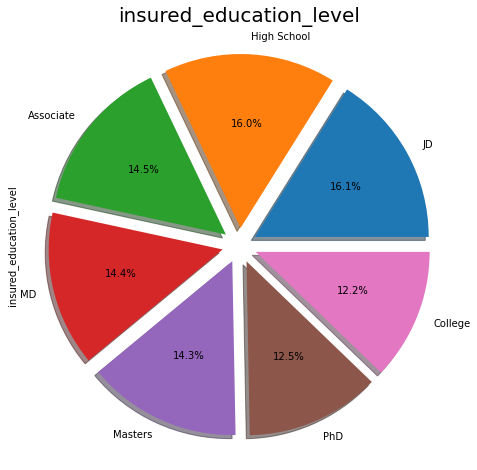

In [125]:
print("Unique values : ")
print(ic['insured_education_level'].unique())
ic.insured_education_level.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],figsize=(8,8),shadow=True,autopct='%1.1f%%')
plt.title('insured_education_level',fontsize=20)

Unique values : 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']




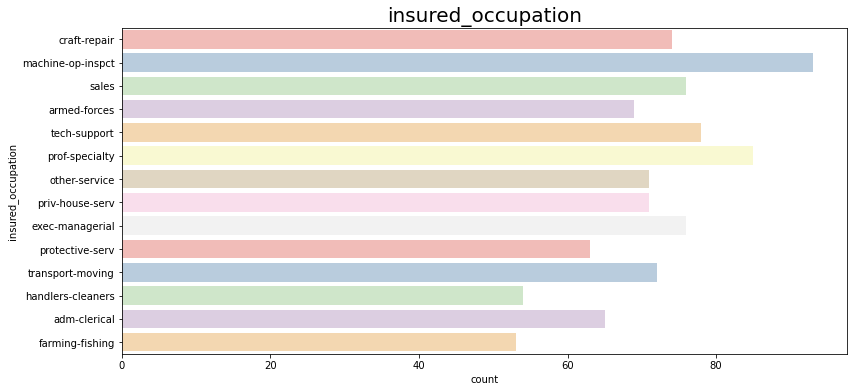

In [126]:
print("Unique values : ")
print(ic['insured_occupation'].unique())
print('\n')
plt.figure(figsize=[13,6])
plt.title('insured_occupation',fontsize=20)
sns.countplot(y=ic['insured_occupation'],palette='Pastel1')
plt.show()

Unique values : 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']




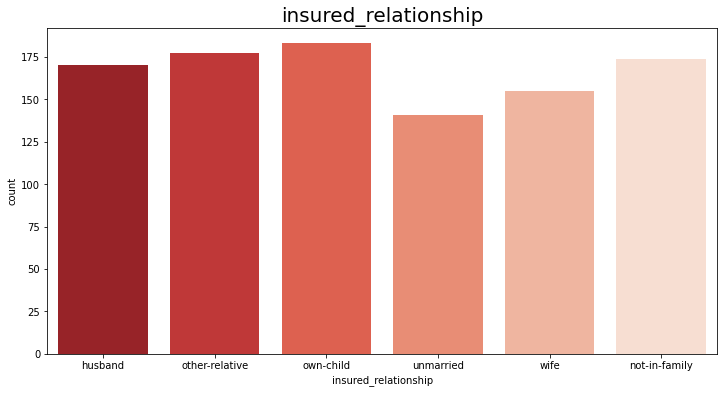

In [127]:
print("Unique values : ")
print(ic['insured_relationship'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('insured_relationship',fontsize=20)
sns.countplot(ic['insured_relationship'],palette='Reds_r')
plt.show()

Unique values : 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']




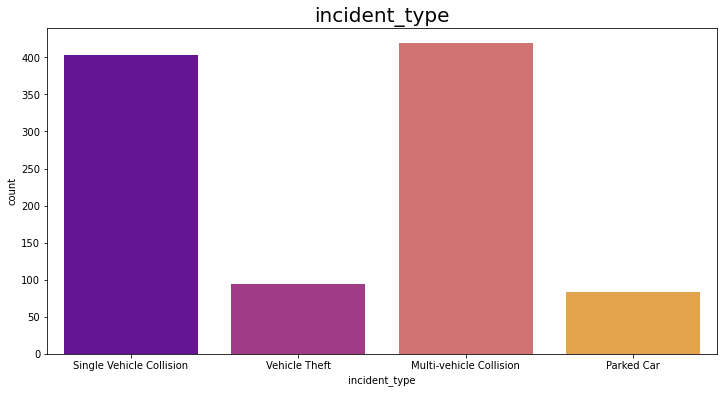

In [128]:
print("Unique values : ")
print(ic['incident_type'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('incident_type',fontsize=20)
sns.countplot(ic['incident_type'],palette='plasma')
plt.show()

Unique values : 
['Side Collision' '?' 'Rear Collision' 'Front Collision']




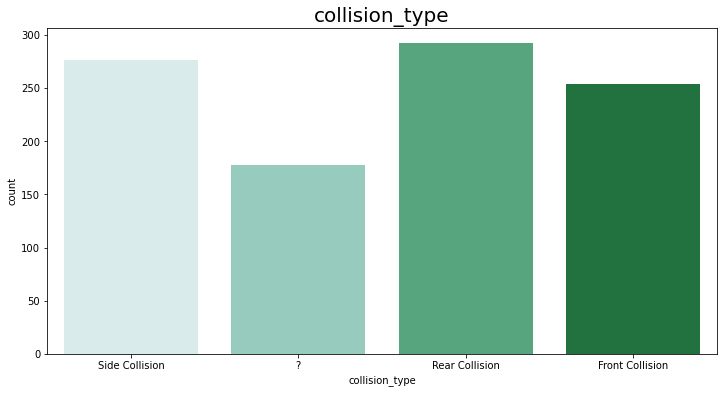

In [129]:
print("Unique values : ")
print(ic['collision_type'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('collision_type',fontsize=20)
sns.countplot(ic['collision_type'],palette='BuGn')
plt.show()

Unique values : 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


<AxesSubplot:title={'center':'incident_severity'}, ylabel='incident_severity'>

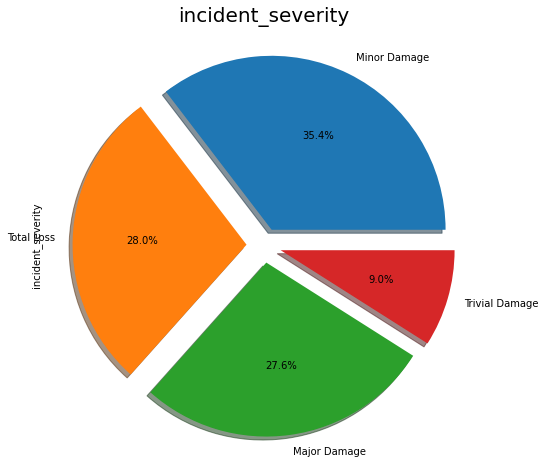

In [130]:
print("Unique values : ")
print(ic['incident_severity'].unique())
plt.title('incident_severity',fontsize=20)
ic.incident_severity.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',figsize=(8,8))

Unique values : 
['Police' 'None' 'Fire' 'Other' 'Ambulance']




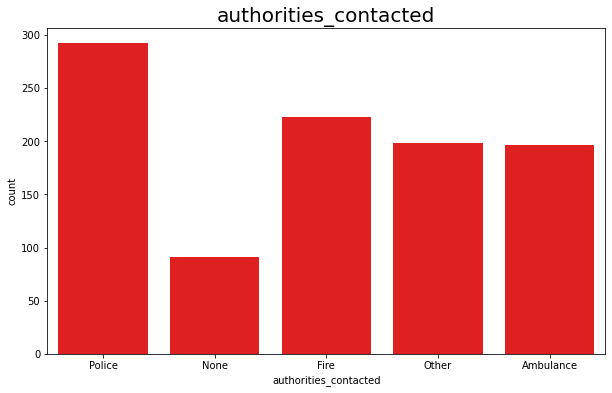

In [131]:
print("Unique values : ")
print(ic['authorities_contacted'].unique())
print('\n')
plt.figure(figsize=[10,6])
plt.title('authorities_contacted',fontsize=20)
sns.countplot(ic['authorities_contacted'],color='r')
plt.show()

Unique values : 
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']




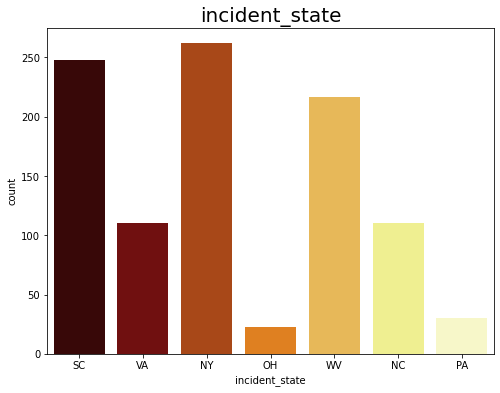

In [132]:
print("Unique values : ")
print(ic['incident_state'].unique())
print('\n')
plt.figure(figsize=[8,6])
plt.title('incident_state',fontsize=20)
sns.countplot(ic['incident_state'],palette='afmhot')
plt.show()

Unique values : 
['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']




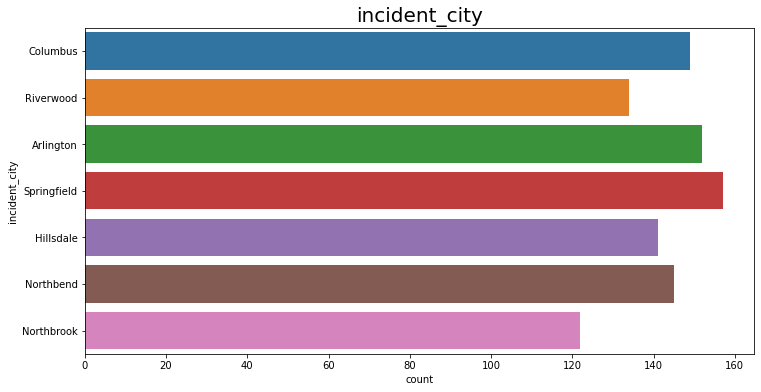

In [133]:
print("Unique values : ")
print(ic['incident_city'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('incident_city',fontsize=20)
sns.countplot(y=ic['incident_city'])
plt.show()

Unique values : 
['YES' '?' 'NO']




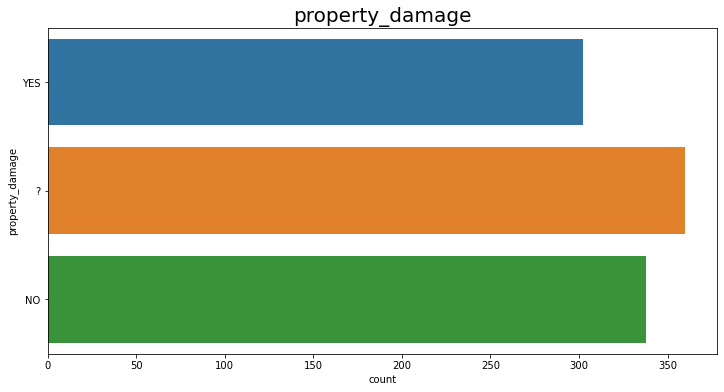

In [134]:
print("Unique values : ")
print(ic['property_damage'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('property_damage',fontsize=20)
sns.countplot(y=ic['property_damage'])
plt.show()

Unique values : 
['YES' '?' 'NO']




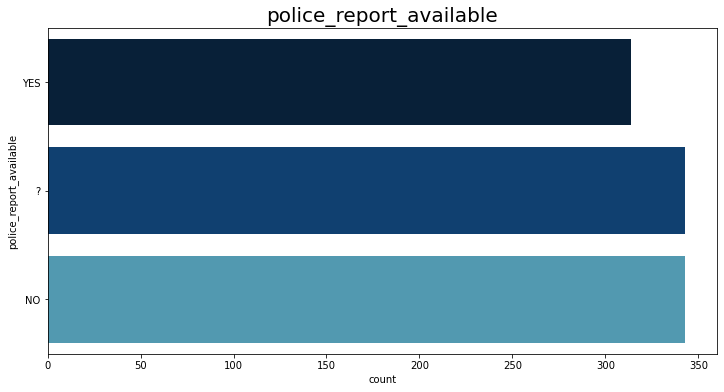

In [135]:
print("Unique values : ")
print(ic['police_report_available'].unique())
print('\n')
plt.figure(figsize=[12,6])
plt.title('police_report_available',fontsize=20)
sns.countplot(y=ic['police_report_available'],palette='ocean')
plt.show()

### Observation-2

From the above results we can conclude that

1) We have a Fraud_reported column as a target variable, in which output is in the form of yes or no.
Yes means - Fraud can be done 
No means - Fraud will not be done.

So in this column the chances of froud is less(753).

2) Auto year is showing the Auto years' information, in which we have avilable years starting from 1995 to 2015.
In 1995, 1999, 2002, 2003, 2005, 2006, 2007, 2009 ,2010 and 2011 huge amount of manifacturing was done as compare to other years.

3) We have many auto models in the dataset, where Ram and wrangler model is the top most accuring model as compare to other models.
    A3, Neon, MDX, jetta, Pathfinder, AS, Malibu and passat model also have a good occuring numbers in the model column.
    
    Accord, X6, MS, RSX auto models have very less occurrence in the column.
    
4) As we can see, insured age is lies between 18 to 65, but 25-50 age group people comes more for doing the claims.

5) We have one more column which is giving the information of policy state, where three state of policy are provided named : OH, IN, IL, and the percentage of preseness is almost equal.

6) Umbrella limit also plays the important role when it comes through insurance claims.In our dataset umbrella_limit is zero in most of the cases.In some cases or we can say in few cases umbrella limit is 4000000, 3000000, 6000000, 7000000, 4000000 and 3000000 as well.

7) Insured gender column shows that both the genders are alomost same in numberin our data set, means the claim is being done by the both the genders equally.

8) When we want to know about the claim is fraudulent or not, education level plays a important role here.
    MD, PhD, Associate, Masters, High School, College and JD education level are present in the columns and having alomost same number of occurance.
    
9) In the incident type column, 4 types of incident are present...

* Single Vehicle Collision incident 
* Vehicle Theft incident
* Multi-vehicle Collision incident
* Parked Car incident

Multi vehicle and single vehicle incident are present in most of the insurance claims as compare to parked cars and vehicle theft incident.

10) Types of collision is side collision, rear collision and front collision on which claims is being done.

11) Incident severity columns is showing the damage. Minor damage(35.4%), major damages(27.6) and total loss(28%) case comes in most of the time, only few cases are present releted to trivial damage(9.0).

12) we have city column also where the incident had taken place. Columbus, springfield, Arlington and northbend are the cities where number of incident are higher.

## Bivariate analysis

Text(0.5, 1.0, 'fraud_reported and incident_severity')

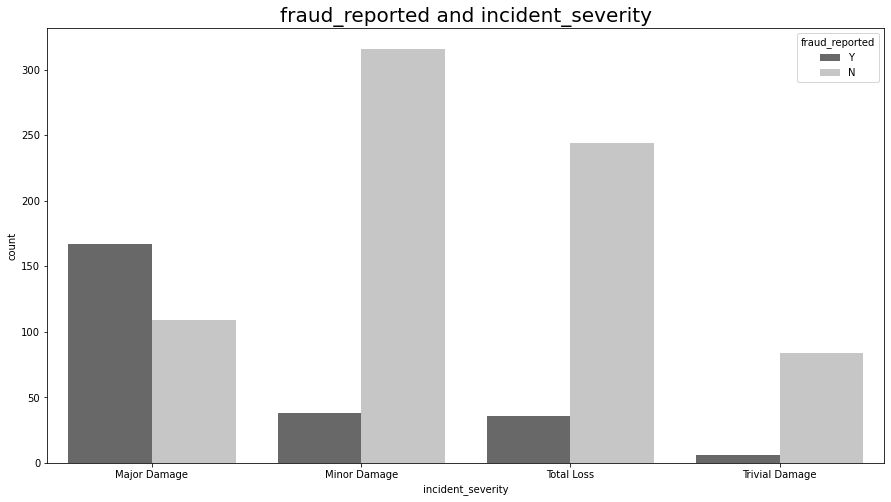

In [137]:
plt.figure(figsize=[15,8])
sns.countplot(ic["incident_severity"], hue=ic["fraud_reported"],palette='Greys_r')
plt.title("fraud_reported and incident_severity",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and incident_city')

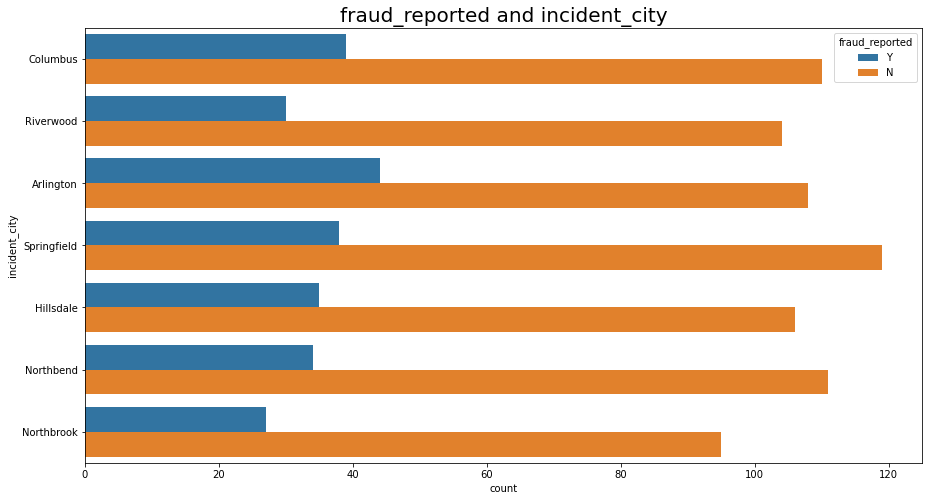

In [138]:
plt.figure(figsize=[15,8])
sns.countplot(y=ic["incident_city"], hue=ic["fraud_reported"],palette='tab10')
plt.title("fraud_reported and incident_city",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and policy_state ')

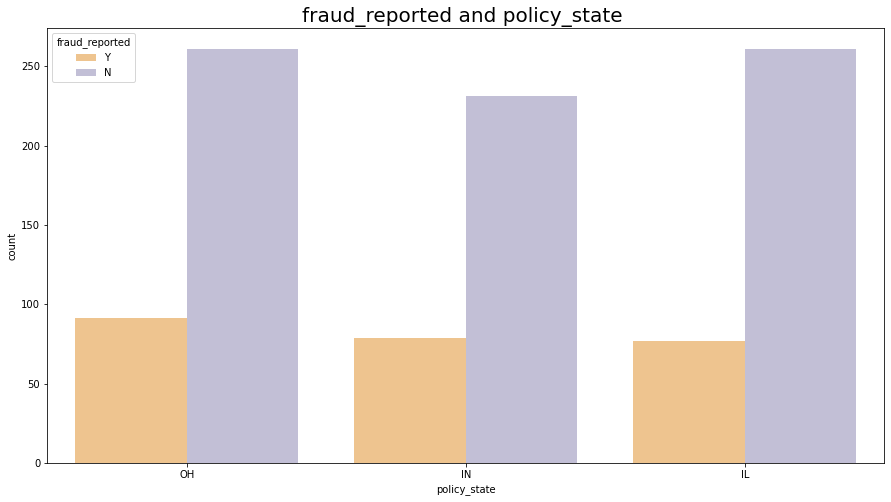

In [139]:
plt.figure(figsize=[15,8])
sns.countplot(ic["policy_state"], hue=ic["fraud_reported"],palette='PuOr')
plt.title("fraud_reported and policy_state ",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and insured_sex ')

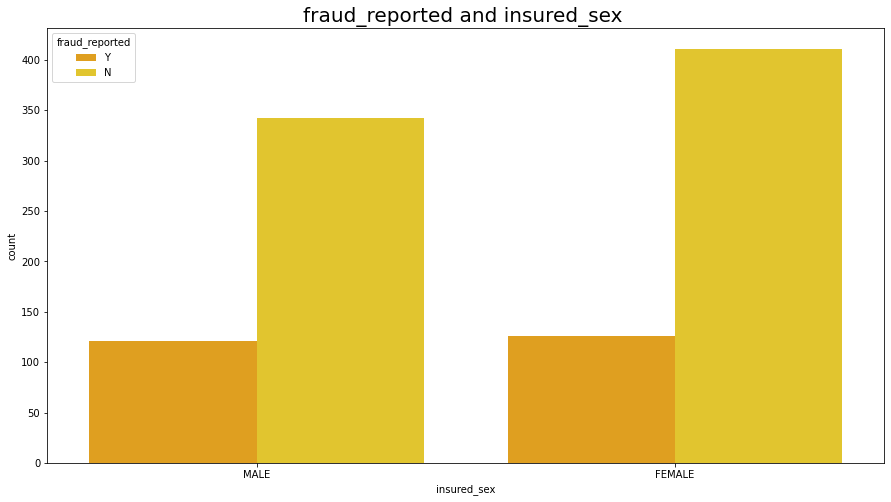

In [140]:
plt.figure(figsize=[15,8])
sns.countplot(ic["insured_sex"], hue=ic["fraud_reported"],palette='Wistia_r')
plt.title("fraud_reported and insured_sex ",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and insured_education_level ')

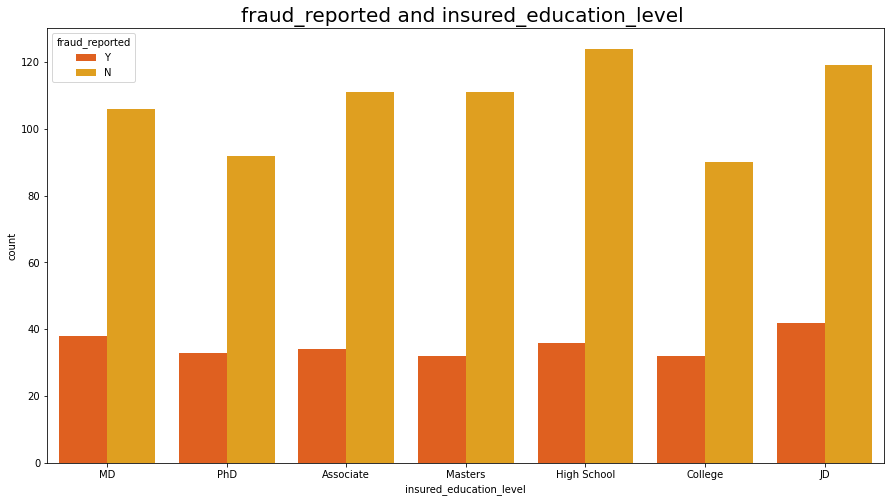

In [141]:
plt.figure(figsize=[15,8])
sns.countplot(ic["insured_education_level"], hue=ic["fraud_reported"],palette='autumn')
plt.title("fraud_reported and insured_education_level ",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and insured_relationship')

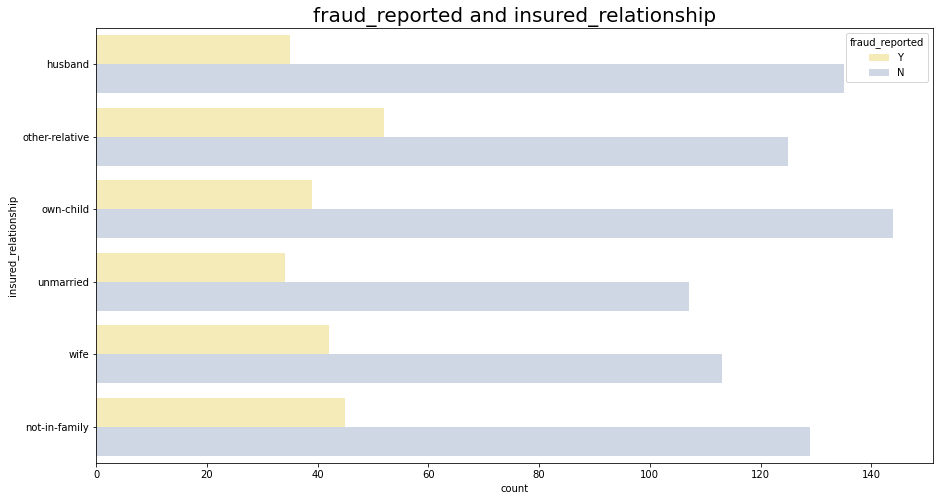

In [142]:
plt.figure(figsize=[15,8])
sns.countplot(y=ic["insured_relationship"], hue=ic["fraud_reported"],palette='Pastel2_r')
plt.title("fraud_reported and insured_relationship",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and incident_type')

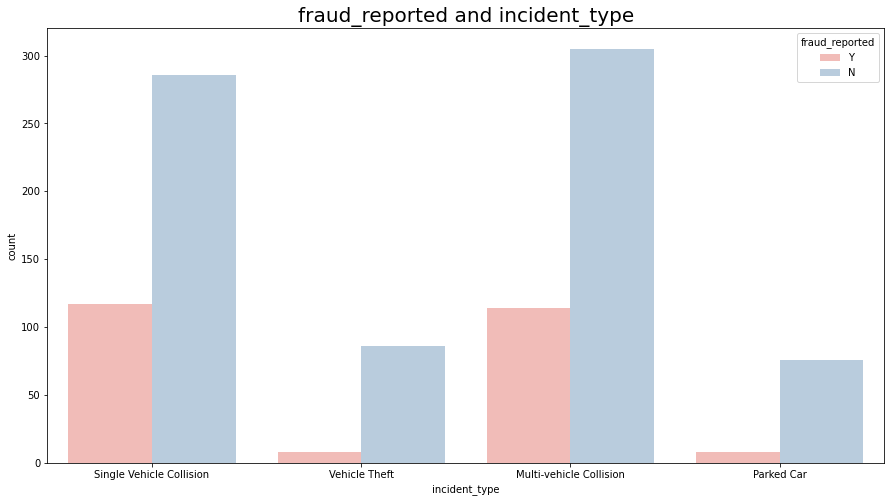

In [143]:
plt.figure(figsize=[15,8])
sns.countplot(ic["incident_type"], hue=ic["fraud_reported"],palette='Pastel1')
plt.title("fraud_reported and incident_type",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and collision_type')

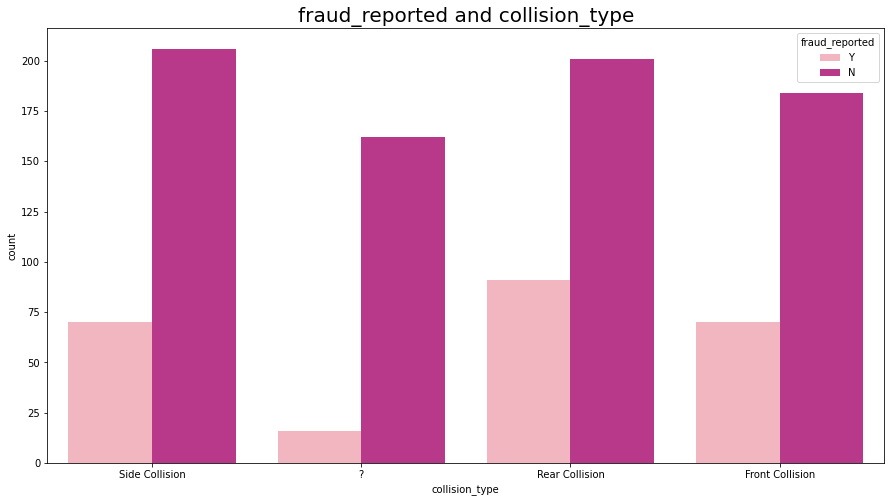

In [144]:
plt.figure(figsize=[15,8])
sns.countplot(ic["collision_type"], hue=ic["fraud_reported"],palette='RdPu')
plt.title("fraud_reported and collision_type",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and incident_severity')

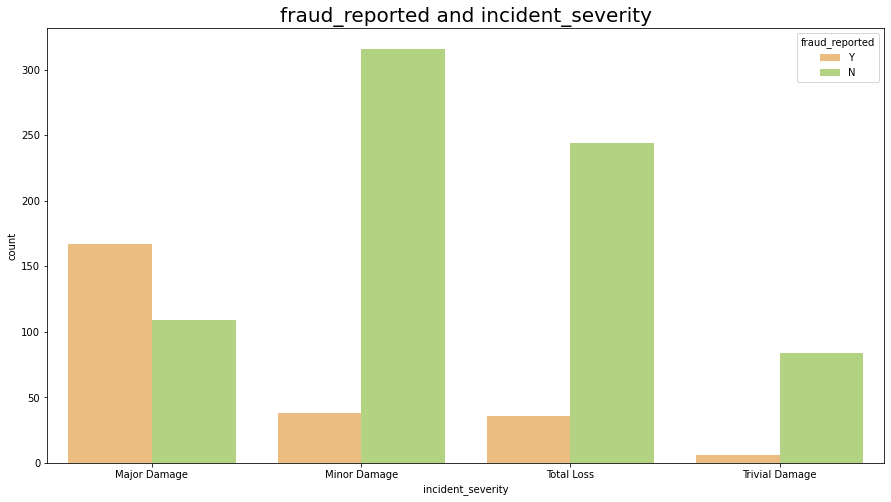

In [145]:
plt.figure(figsize=[15,8])
sns.countplot(ic["incident_severity"], hue=ic["fraud_reported"],palette='RdYlGn')
plt.title("fraud_reported and incident_severity",fontsize=20)

Text(0.5, 1.0, 'fraud_reported and auto_make')

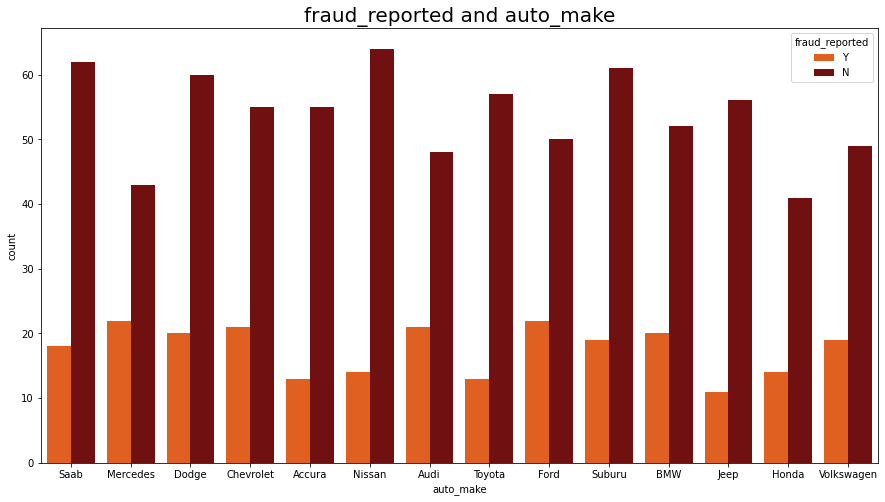

In [146]:
plt.figure(figsize=[15,8])
sns.countplot(ic["auto_make"], hue=ic["fraud_reported"],palette='gist_heat_r')
plt.title("fraud_reported and auto_make",fontsize=20)

### Observation-3

From the above results we can conclude that

1) Fraud_reported and incident_severity - In the major damage, fraud reported output is yes means when the damaj is major the chances of fraud is higher.
     And in the minor damage and total loss fraud report less in the side of yes means the chances of fraud is less. and in the trival damage the chances of fraud is very less.
     
2) In the columbus and arlington city fraud cases are high as compare to other cities. Northbrook and riverwood cities have less froud cases.

3) Fraud cases are present equally in all the three policy_state.

4) Fraud cases are beign found in all the Education level.

5) When the incident types are single vehicle collision and multi vehicle collision the chances of fraud cases are high and in case of vehicle theft and parked car the chances of fraud is very less.

6) In the case of Rear collision the chances of fraud is little bit high and in the case of front and side collision the chance of fraud is also high and equal as well.

7) If we focous the auto make and fraud reported column we will found that toyota, jeep, Nissan and Accura are claming less fraud case as compare to others auto make and rest auto makes are claming almost equally fraud cases.

## Dropping some columns

We are dropping some columns which are not so usefull for building the machin learning model and also it will not help us to predict the target column.

In [148]:
ic.drop(['policy_number'],axis=1,inplace=True)
ic.drop(['insured_zip'],axis=1,inplace=True)
ic.drop(['incident_location'],axis=1,inplace=True)
ic.drop(['_c39'],axis=1,inplace=True)

In [149]:
ic.shape

(1000, 36)

### Extracting month and year from policy_bind_date and incident_date

In [150]:
ic['Policy_bind_month']=pd.to_datetime(ic['policy_bind_date']).dt.month

In [151]:
ic['Policy_bind_year']=pd.to_datetime(ic['policy_bind_date']).dt.year

In [152]:
ic.drop(['policy_bind_date'],axis=1,inplace=True)

In [153]:
ic['incident_month']=pd.to_datetime(ic['incident_date']).dt.month
ic['incident_year']=pd.to_datetime(ic['incident_date']).dt.year

In [154]:
ic.drop(['incident_date'],axis=1,inplace=True)

In [155]:
ic.head(6)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_bind_month,Policy_bind_year,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,2014,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,2006,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,2000,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,2014,2,2015
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,12,2006,2,2015


In [156]:
ic['incident_year'].unique()

array([2015], dtype=int64)

In [157]:
ic.drop(['incident_year'],axis=1,inplace=True)

### Changing the format of month_as_customer column

In [158]:
print('min values is ',ic['months_as_customer'].min())
print('max values is ',ic['months_as_customer'].max())

min values is  0
max values is  479


In [159]:
ic['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [160]:
for i in ic['months_as_customer']:
    if i == 0 :
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'0 month'})
    if i >= 1 and i < 36: 
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'1-3 years'})
    if i >=36 and i < 72 :  
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'3-6 years'})
    if i >= 72 and i < 108:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'6-9 years'})
    if i>=108 and i < 144 :
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'9-12 years'})
    if i >=144 and i < 180:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'12-15 years'})
    if i>= 180 and i < 216:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'15-18 years'})
    if i >= 216 and i < 252:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'18-21 years'})
    if i>= 252 and i < 288 :
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'21-24 years'})
    if i >= 288 and i < 324:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'24-27 years'})
    if i >= 324 and i < 360:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'27-30 years'}) 
    if i >= 360 and i < 396:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'30-33 years'}) 
    if i >= 396 and i < 432:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'33-36 years'})
    if i >= 432 and i < 468 :
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'36-39 years'})
    if i >= 468 and i < 504:
        ic['months_as_customer']=ic['months_as_customer'].replace({i:'39-42 years'})    

In [161]:
ic['months_as_customer'].value_counts()

21-24 years    131
9-12 years     113
18-21 years    110
12-15 years    104
15-18 years    100
6-9 years       99
1-3 years       65
3-6 years       65
24-27 years     64
27-30 years     37
36-39 years     37
33-36 years     36
30-33 years     28
39-42 years     10
0 month          1
Name: months_as_customer, dtype: int64

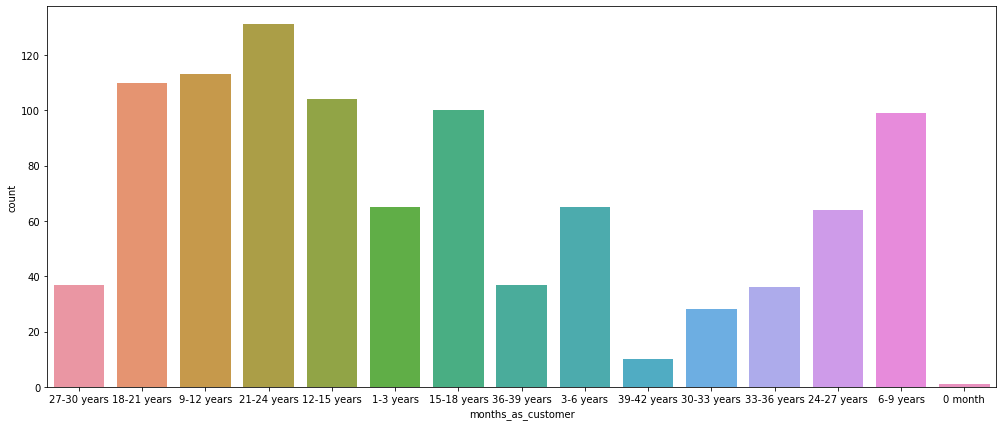

In [162]:
plt.figure(figsize=[17,7])
sns.countplot(ic['months_as_customer'])
plt.show()

### Changing the format of age column

In [163]:
ic['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [164]:
print('min values is ',ic['age'].min())
print('max values is ',ic['age'].max())

min values is  19
max values is  64


In [165]:
for i in ic['age']:
    if i > 15 and i < 20:
        ic['age']=ic['age'].replace({i:'less than 20 year'})
    if i >= 20 and i < 25:
        ic['age']=ic['age'].replace({i:'20-25 year'}) 
    if i >= 25 and i < 30:
        ic['age']=ic['age'].replace({i:'25-30 year'}) 
    if i >= 30 and i < 35:
        ic['age']=ic['age'].replace({i:'30-35 year'})
    if i >= 35 and i < 40:
        ic['age']=ic['age'].replace({i:'35-40 year'})
    if i >= 40 and i < 45:
        ic['age']=ic['age'].replace({i:'40-45 year'})  
    if i >= 45 and i < 50:
        ic['age']=ic['age'].replace({i:'45-50 year'})
    if i >= 50 and i < 55:
        ic['age']=ic['age'].replace({i:'50-55 year'})
    if i >= 55 and i < 60:
        ic['age']=ic['age'].replace({i:'55-60 year'})
    if i >= 60 and i < 65:
        ic['age']=ic['age'].replace({i:'60-65 year'})    

In [166]:
ic['age'].value_counts()

30-35 year           205
40-45 year           196
35-40 year           195
25-30 year           129
45-50 year           122
55-60 year            51
50-55 year            49
60-65 year            27
20-25 year            25
less than 20 year      1
Name: age, dtype: int64

In [167]:
ic.head(6)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_bind_month,Policy_bind_year,incident_month
0,27-30 years,45-50 year,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,2014,1
1,18-21 years,40-45 year,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,2006,1
2,9-12 years,25-30 year,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,2000,2
3,21-24 years,40-45 year,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,10
4,18-21 years,40-45 year,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,2014,2
5,21-24 years,35-40 year,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,12,2006,2


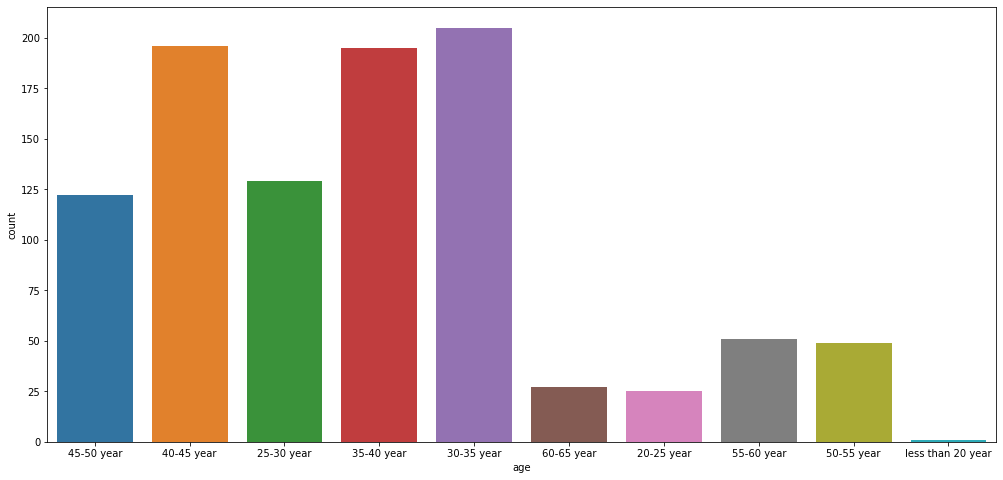

In [168]:
plt.figure(figsize=[17,8])
sns.countplot(ic['age'])
plt.show()

## Adopting encoding technique 

In [169]:
obj_col=['months_as_customer','age','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
         'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_severity',
        'authorities_contacted','incident_state','incident_city','property_damage','police_report_available',
        'auto_make','auto_model','fraud_reported']

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le=LabelEncoder()

In [172]:
for i in obj_col:
    ic[i]=le.fit_transform(ic[i])

In [173]:
ic.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_bind_month,Policy_bind_year,incident_month
0,7,5,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,10,2014,1
1,4,4,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,6,2006,1
2,14,1,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,6,2000,2
3,5,4,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,5,1990,10
4,4,4,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,6,2014,2


## Checking Outliers

In [174]:
ic.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_bind_month,Policy_bind_year,incident_month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.839000,3.394000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.666000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,6.559000,2001.604000,3.407000
std,4.313199,1.856397,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,1.063755,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,3.391758,7.360391,3.276291
min,0.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1990.000000,1.000000
25%,3.000000,2.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,4.000000,1995.000000,1.000000
50%,5.000000,3.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,7.000000,2002.000000,2.000000
75%,11.000000,4.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,9.000000,2008.000000,5.000000
max,14.000000,9.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,12.000000,2015.000000,12.000000


months_as_customer                AxesSubplot(0.125,0.830974;0.227941x0.049026)
age                            AxesSubplot(0.398529,0.830974;0.227941x0.049026)
policy_state                   AxesSubplot(0.672059,0.830974;0.227941x0.049026)
policy_csl                        AxesSubplot(0.125,0.772143;0.227941x0.049026)
policy_deductable              AxesSubplot(0.398529,0.772143;0.227941x0.049026)
policy_annual_premium          AxesSubplot(0.672059,0.772143;0.227941x0.049026)
umbrella_limit                    AxesSubplot(0.125,0.713312;0.227941x0.049026)
insured_sex                    AxesSubplot(0.398529,0.713312;0.227941x0.049026)
insured_education_level        AxesSubplot(0.672059,0.713312;0.227941x0.049026)
insured_occupation                AxesSubplot(0.125,0.654481;0.227941x0.049026)
insured_hobbies                AxesSubplot(0.398529,0.654481;0.227941x0.049026)
insured_relationship           AxesSubplot(0.672059,0.654481;0.227941x0.049026)
capital-gains                     AxesSu

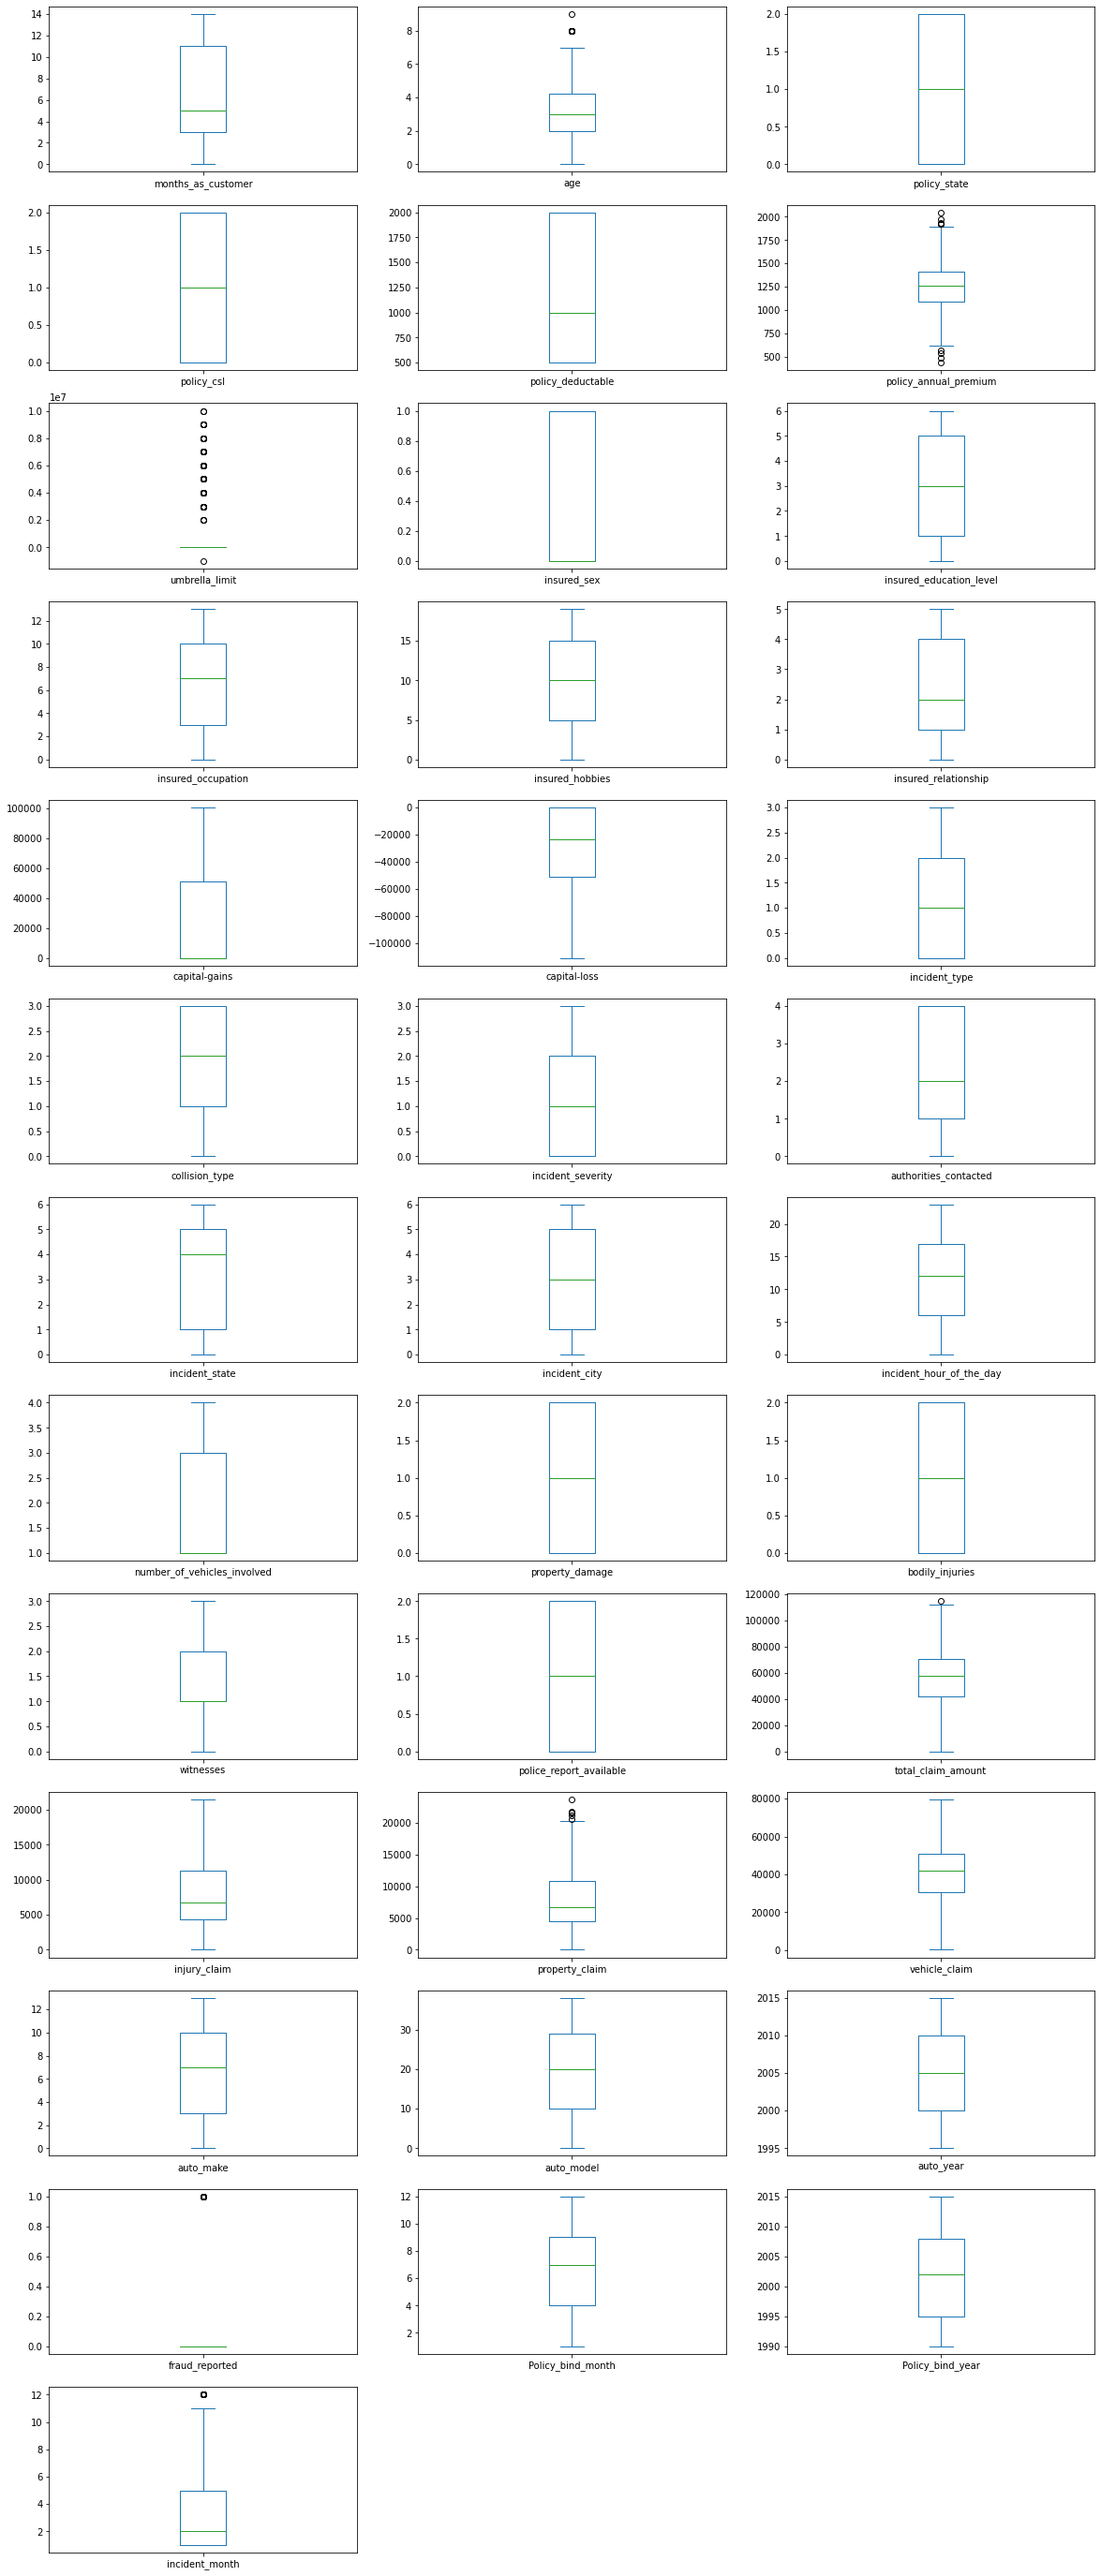

In [175]:
ic.plot(kind='box',subplots=True,figsize=[20,50],layout=(13,3))

### Observation-4

1) We removed policy number, insured zip, incident location and _c39 columns because these columns was not important for building the machine learning model.

2) We changed policy_bind_date and incident_date column in the date time format and then extract month and year and after this we droped both these columns.

3) We have changed the format of months_as_customer column in the year format So that our machine can easily understand the inputs of this column..

4) Same work we did with age column and devide the age column in the group format.

5) We have done with encoding with some columns to change the datatype ie. object datatype to int datatype.

6) In our dataset few columns has outliers. 

7) We checked outliers and found the outliers in policy_annual_premium and property_claim column, because the standard daviation of this column is high which shows the posibility of outliers present.


## Checking skewness 

In [177]:
from scipy.stats import skew

In [178]:
ic.skew()

months_as_customer             0.451717
age                            0.518549
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636


months_as_customer
0.45103961666432185


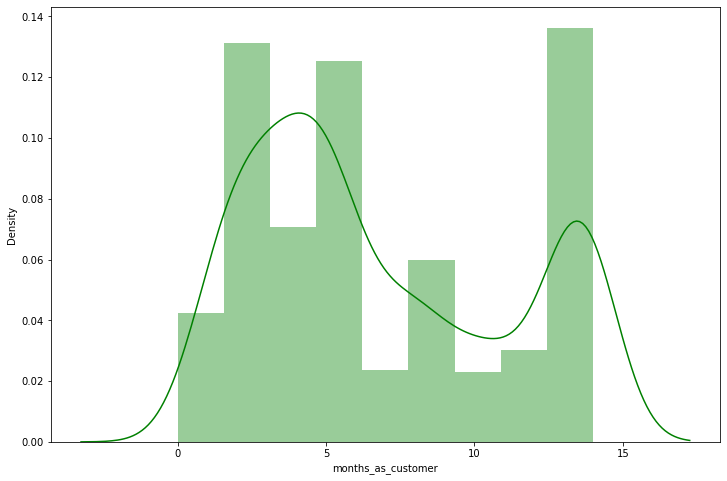

age
0.5177709210962413


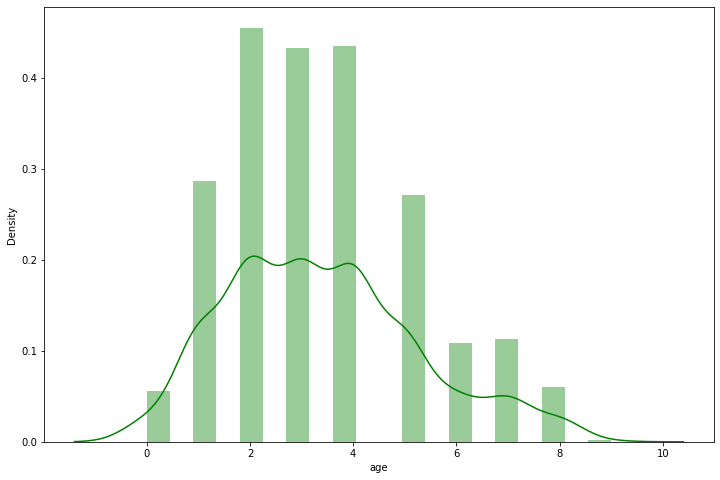

policy_state
-0.026137504198744846


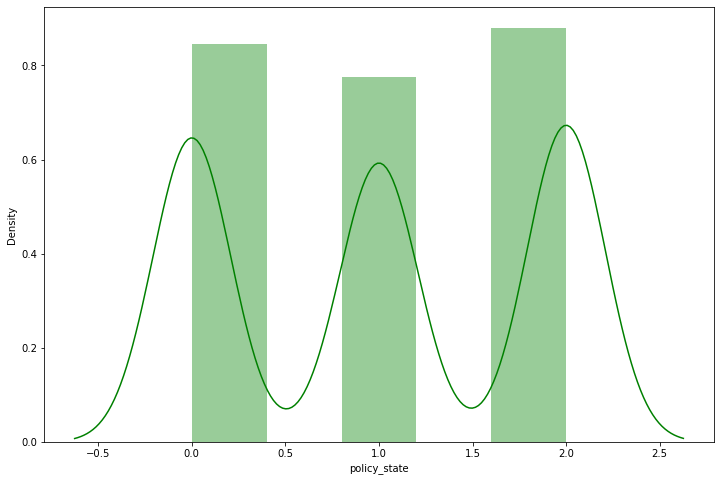

policy_csl
0.08879442824718038


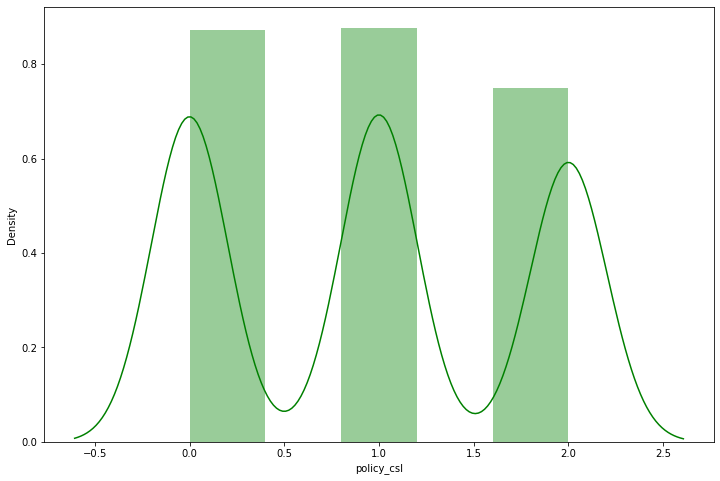

policy_deductable
0.47717008402692257


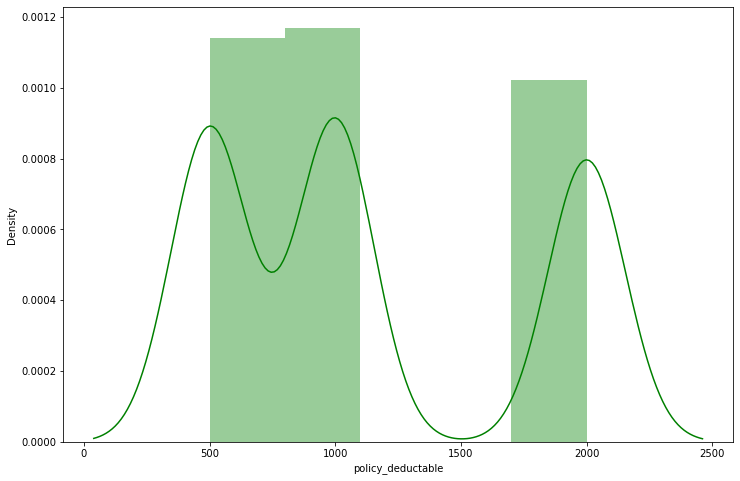

policy_annual_premium
0.004395388781646907


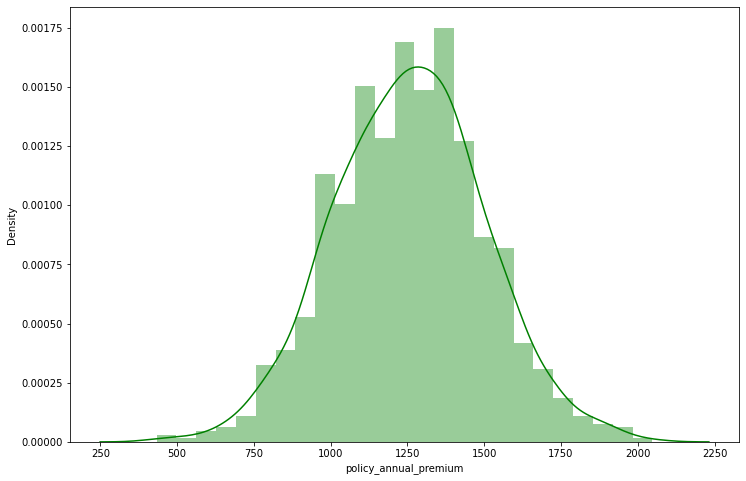

umbrella_limit
1.804001000430236


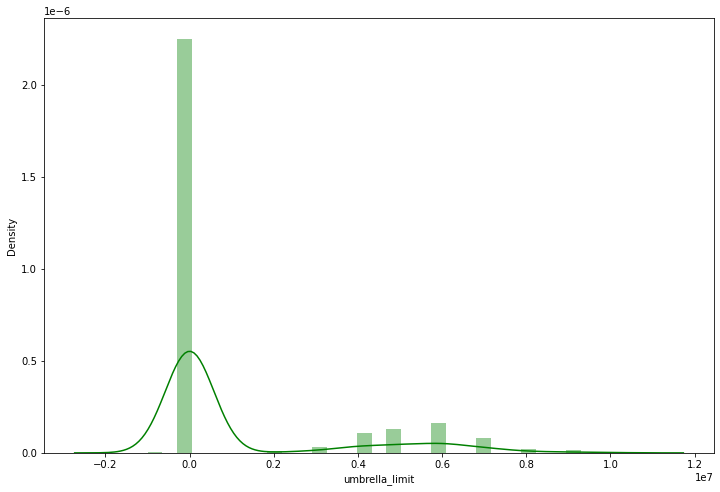

insured_sex
0.1484068958860874


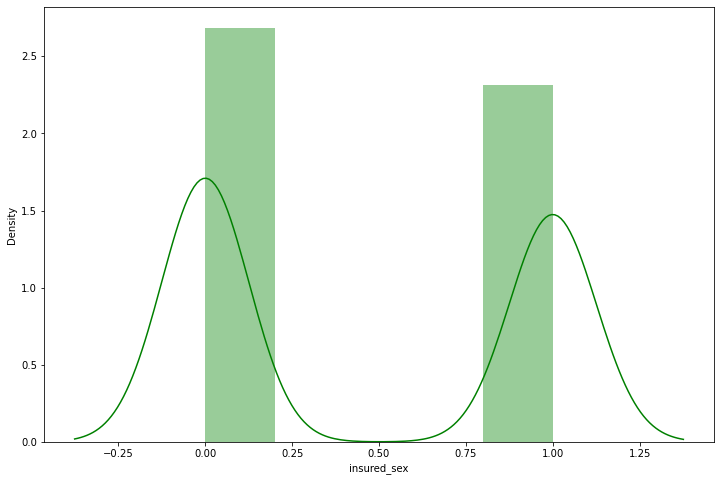

insured_education_level
-0.00014764583772972734


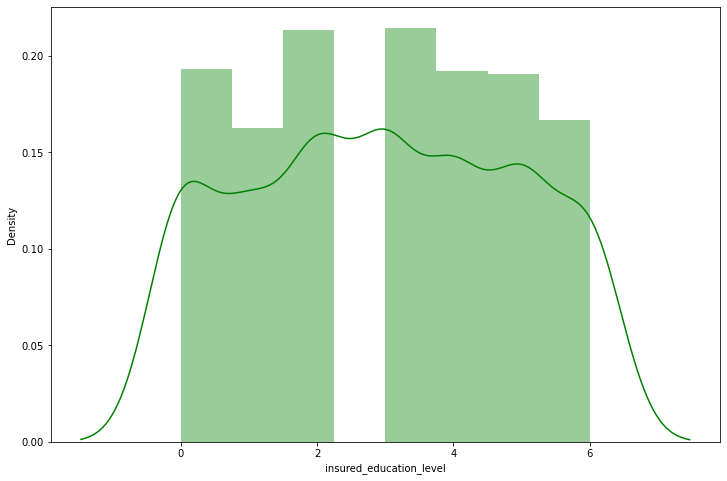

insured_occupation
-0.05879282395976636


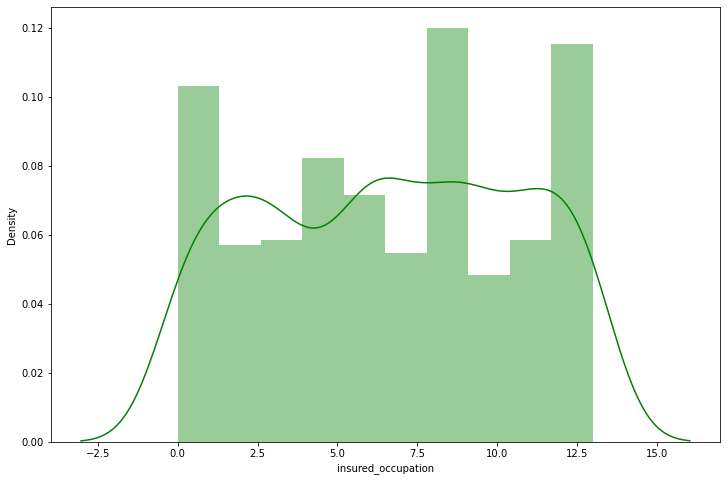

insured_hobbies
-0.061470482576836565


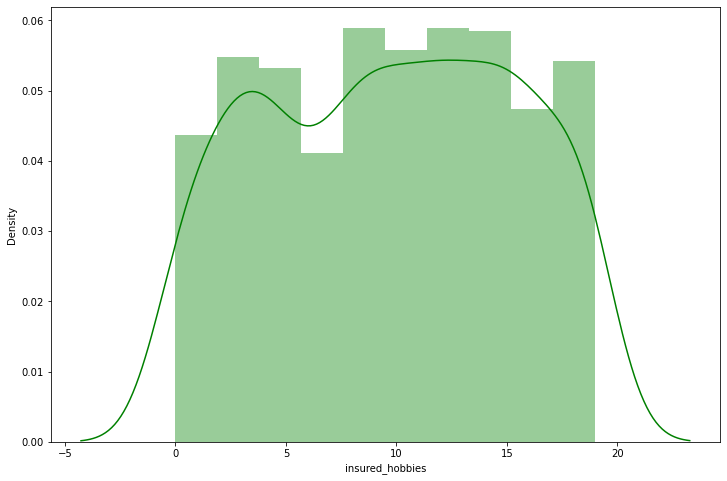

insured_relationship
0.0773717824285205


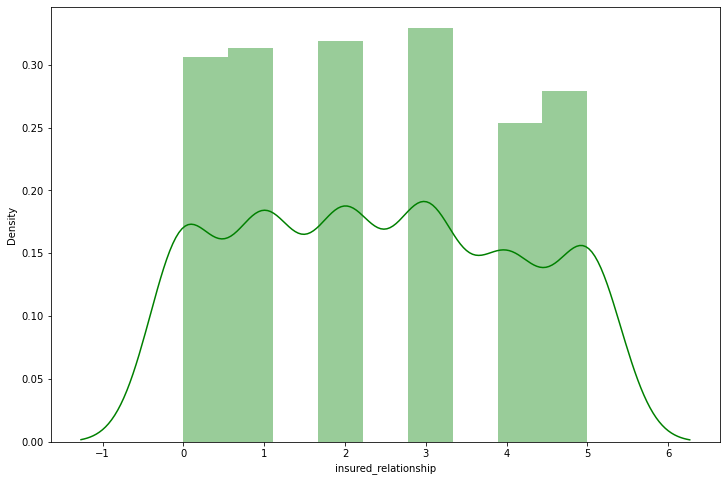

capital-gains
0.4781316547453607


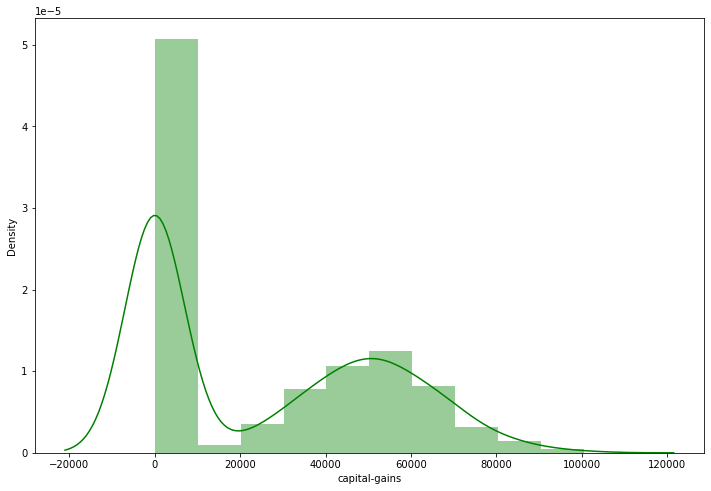

capital-loss
-0.3908844902380315


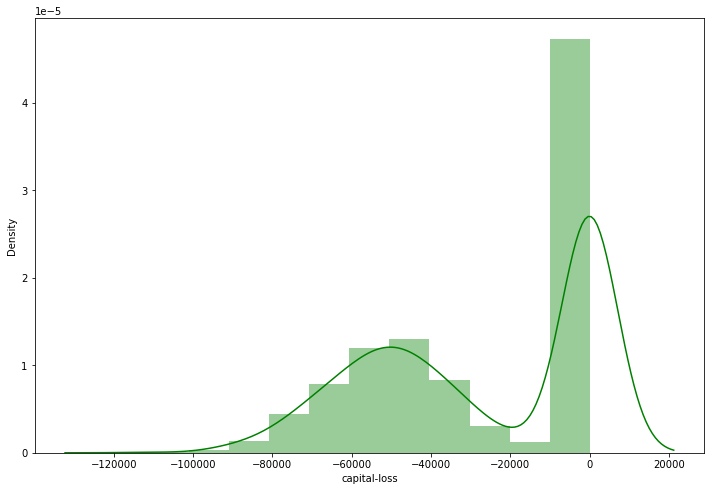

incident_type
0.1013547038173225


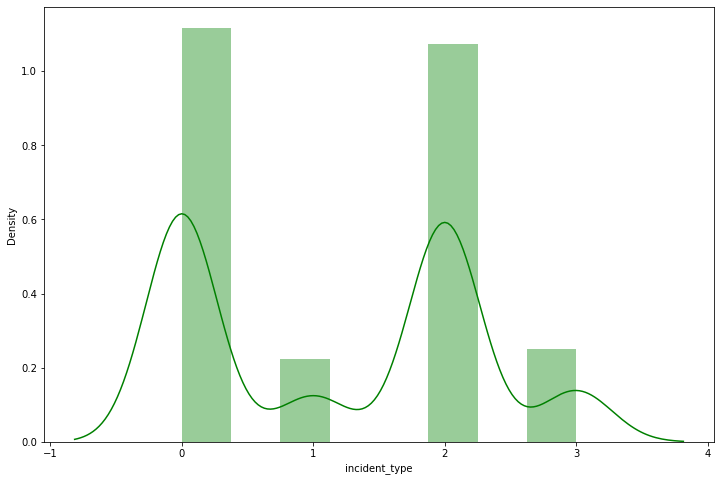

collision_type
-0.19305483483225155


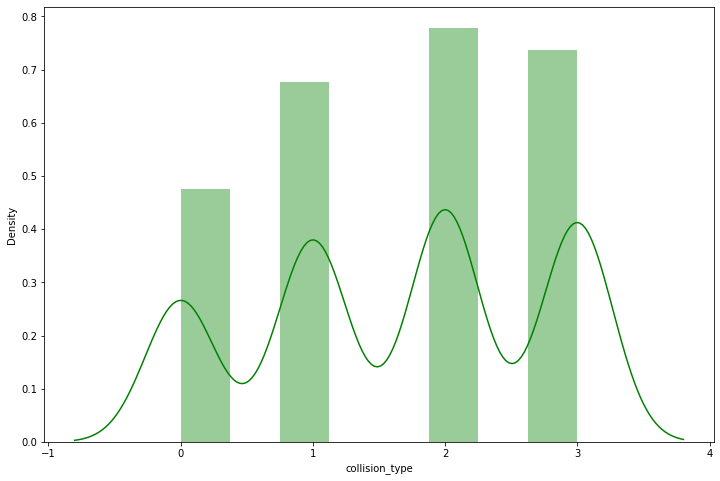

incident_severity
0.27859761575126224


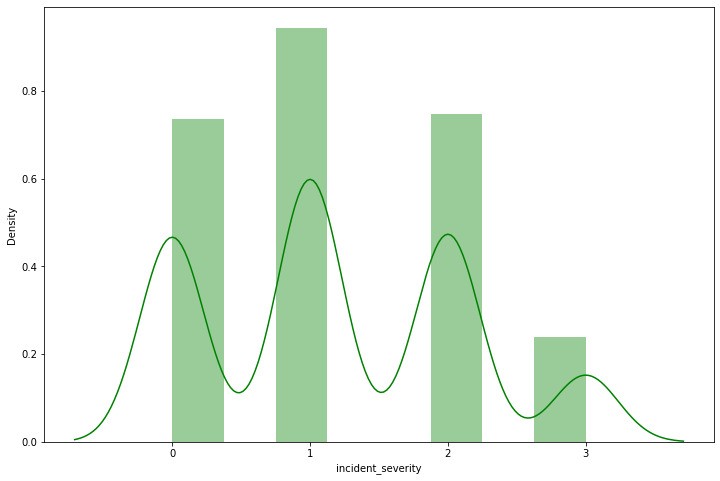

authorities_contacted
-0.12156174315320889


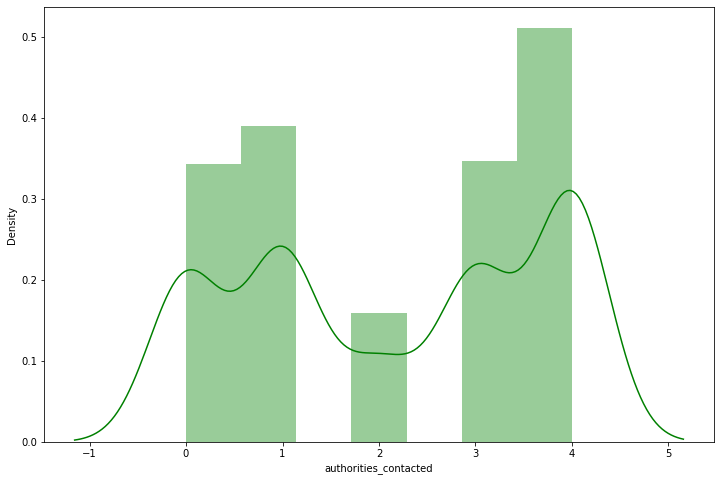

incident_state
-0.14864196325391382


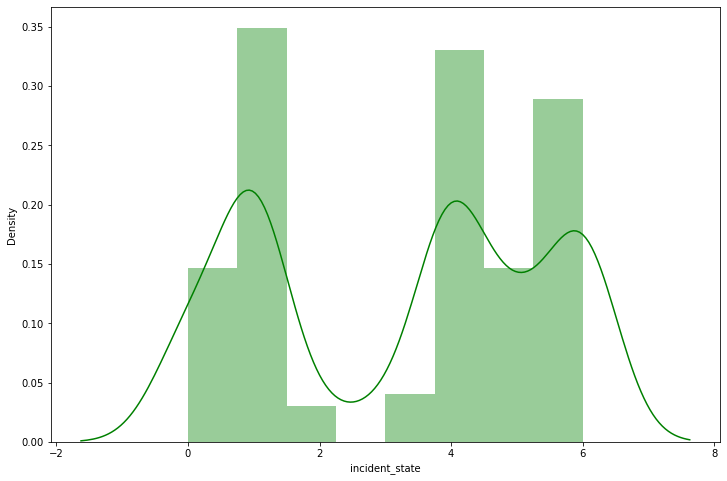

incident_city
0.04945631534093415


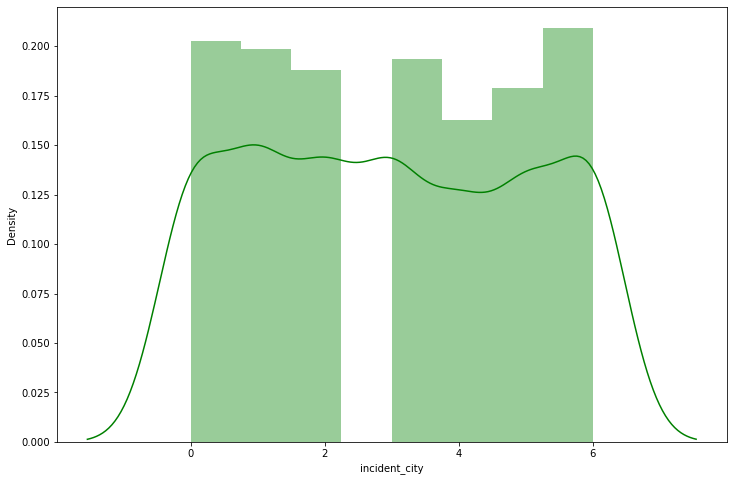

incident_hour_of_the_day
-0.03553106748270712


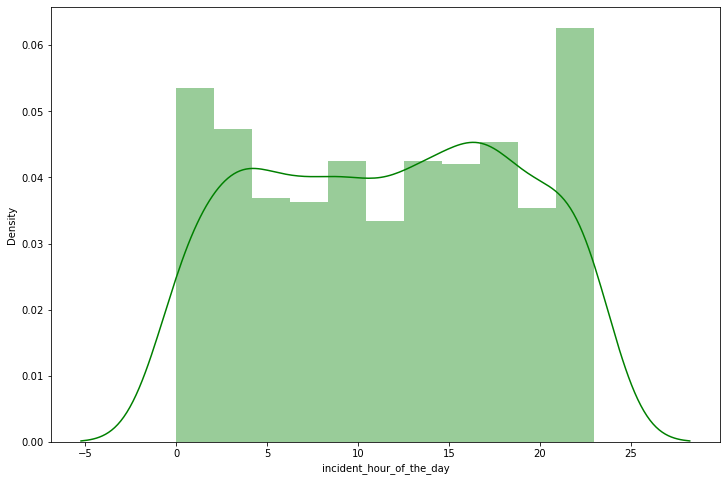

number_of_vehicles_involved
0.5019097769712054


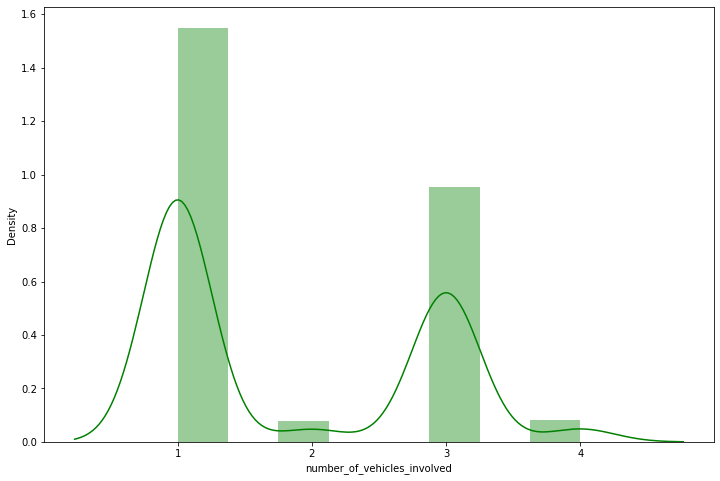

property_damage
0.10625836602112458


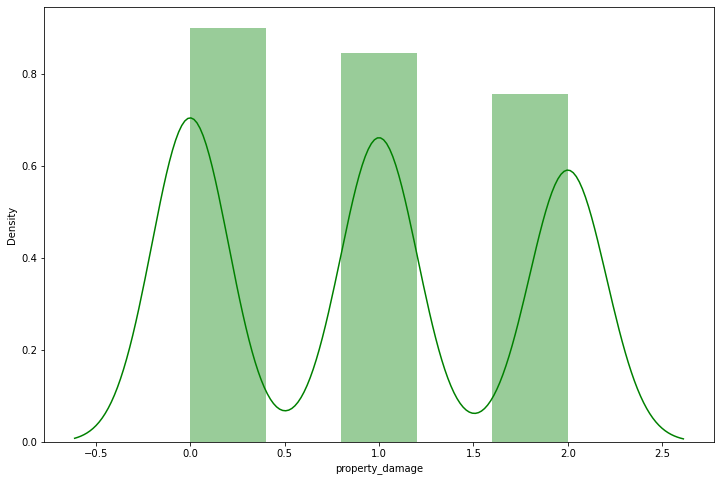

bodily_injuries
0.014754928613816467


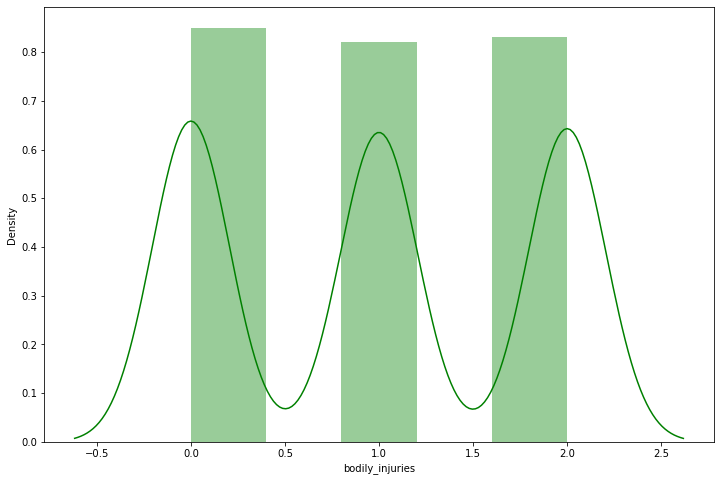

witnesses
0.019606952945384615


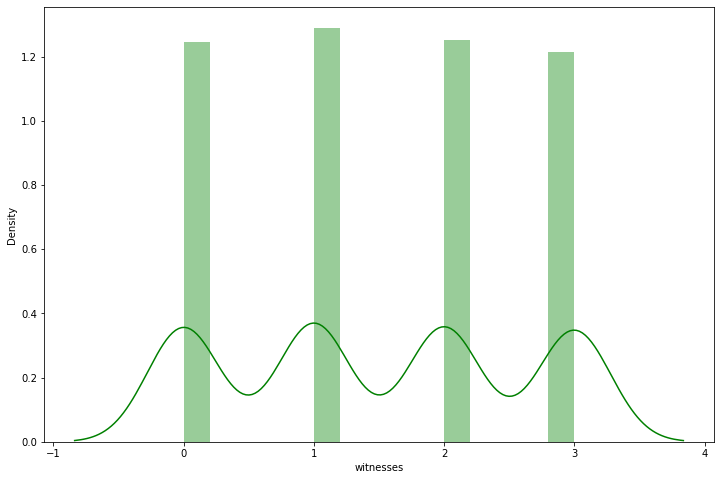

police_report_available
0.052887207978431584


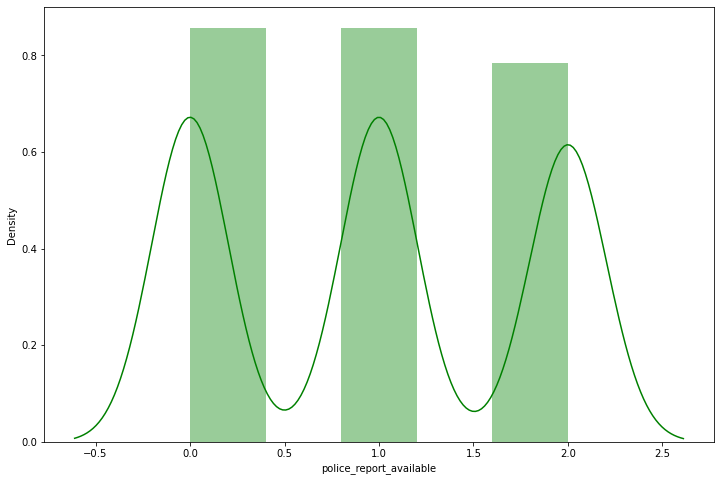

total_claim_amount
-0.593689743653387


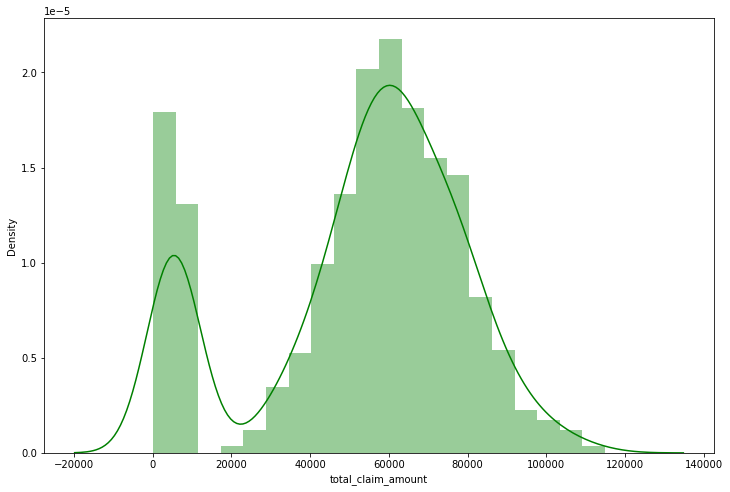

injury_claim
0.2644134965313636


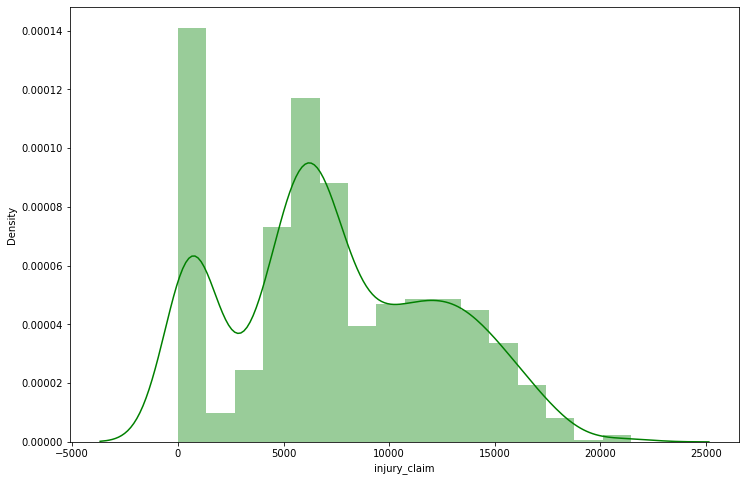

property_claim
0.37760128674511556


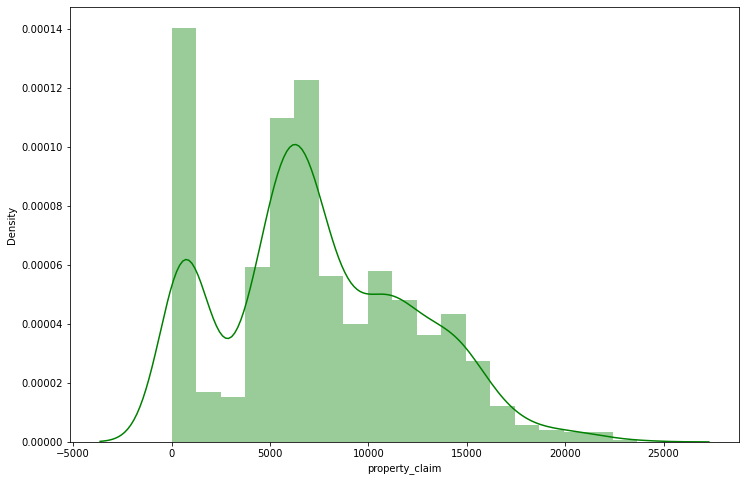

vehicle_claim
-0.6201658958678784


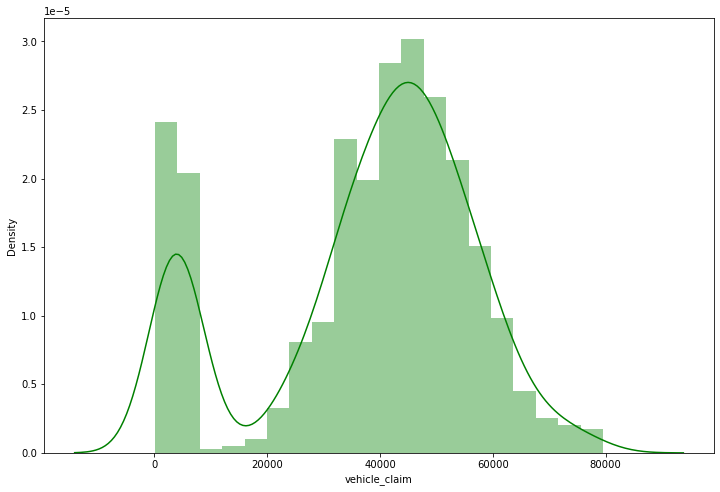

auto_make
-0.018768361197556645


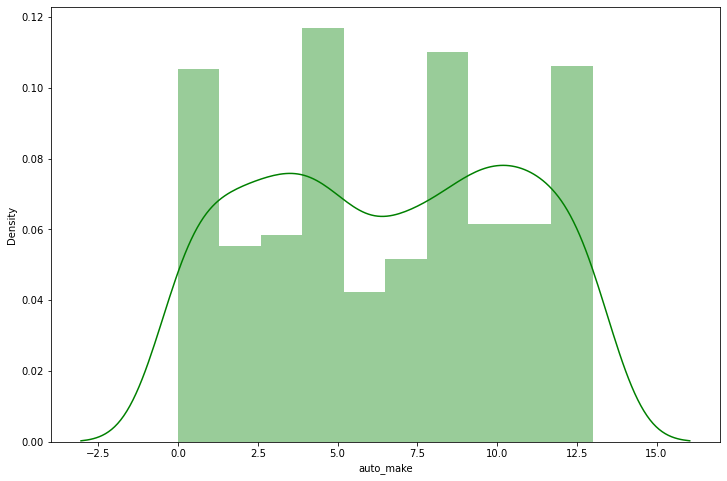

auto_model
-0.08065133467296177


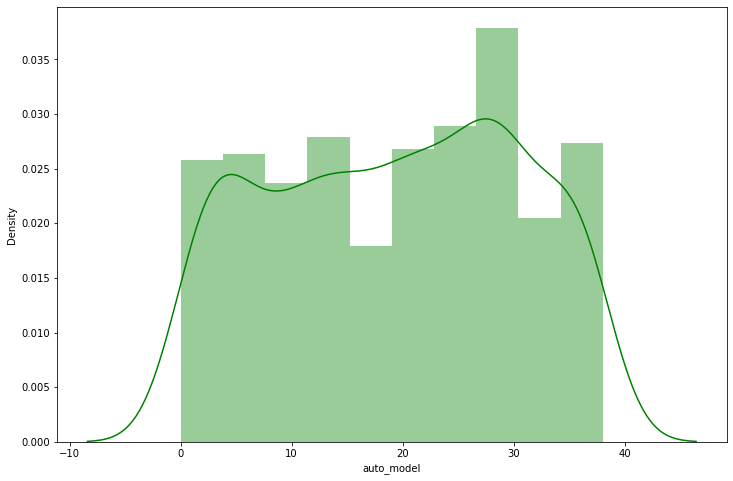

auto_year
-0.04821634370155536


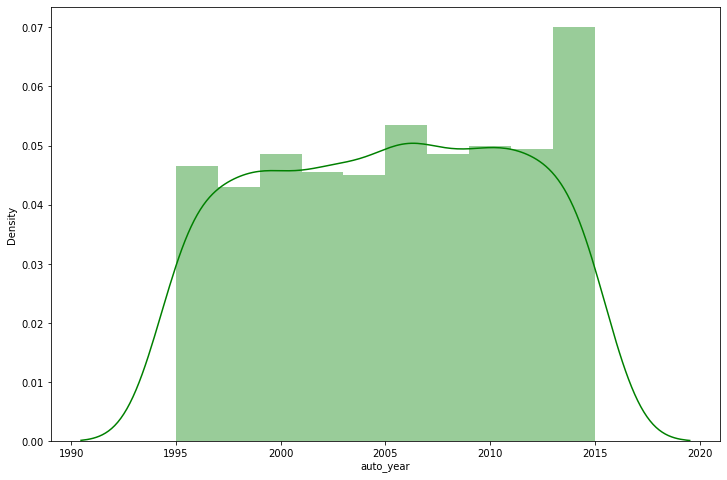

fraud_reported
1.1732877926115954


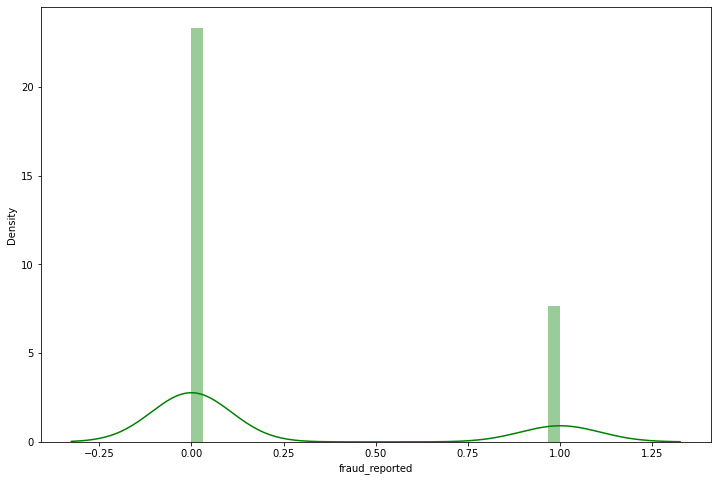

Policy_bind_month
-0.029276719862706007


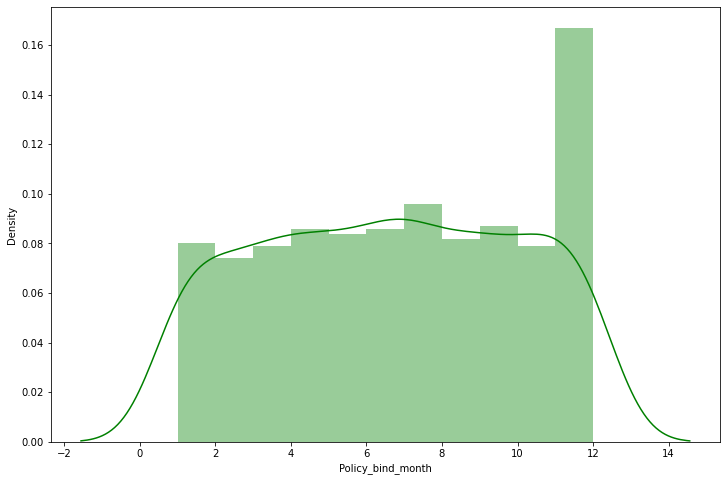

Policy_bind_year
0.0524321567057448


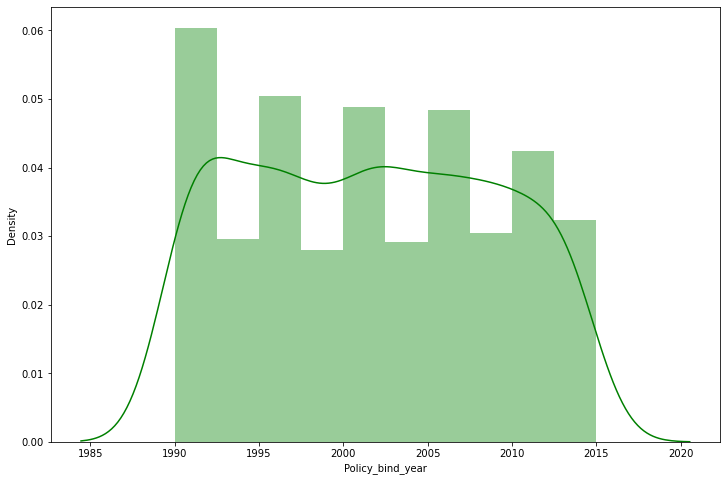

incident_month
1.3738295271929086


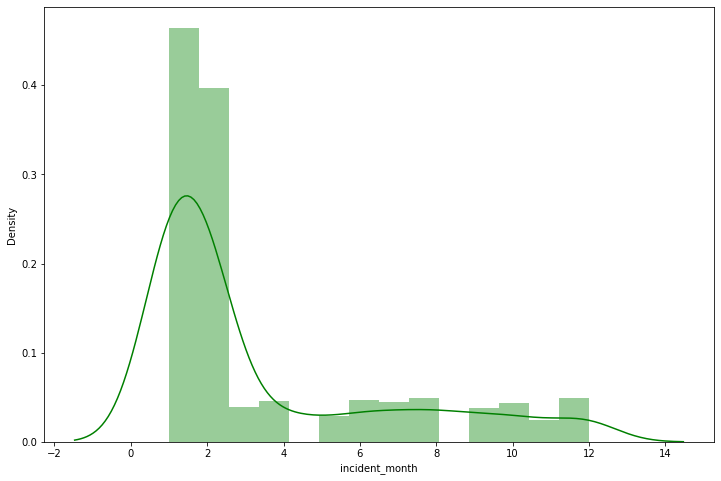

In [179]:
for i in ic:
    print(i)
    print(skew(ic[i]))
    
    plt.figure(figsize=[12,8])
    sns.distplot(ic[i],color='g')
    plt.show()

## Checking Correlation

In [181]:
ic.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
Policy_bind_month             -0.030829
property_damage               -0.030497
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
months_as_customer            -0.018413
capital-loss                  -0.014863
policy_annual_premium         -0.014480
Policy_bind_year              -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
incident_month                 0.014495
policy_deductable              0.014817
age                            0.017098
insured_relationship           0.021043


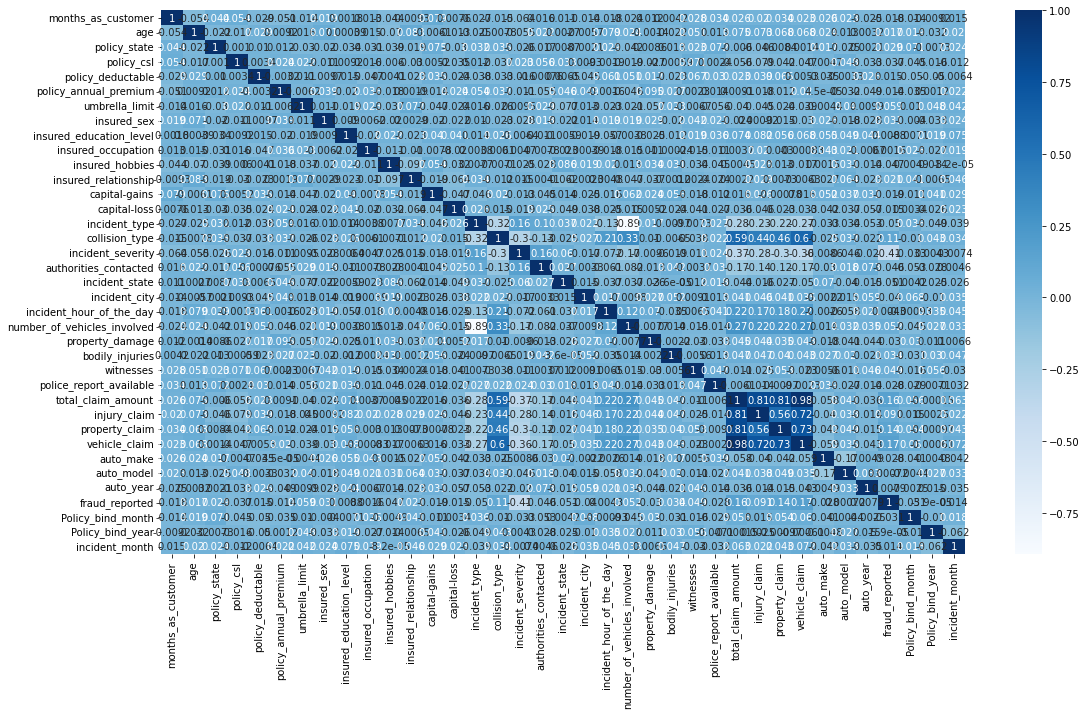

In [182]:
plt.figure(figsize=[18,10])
sns.heatmap(ic.corr(),annot=True,cmap='Blues')
plt.show()

<AxesSubplot:>

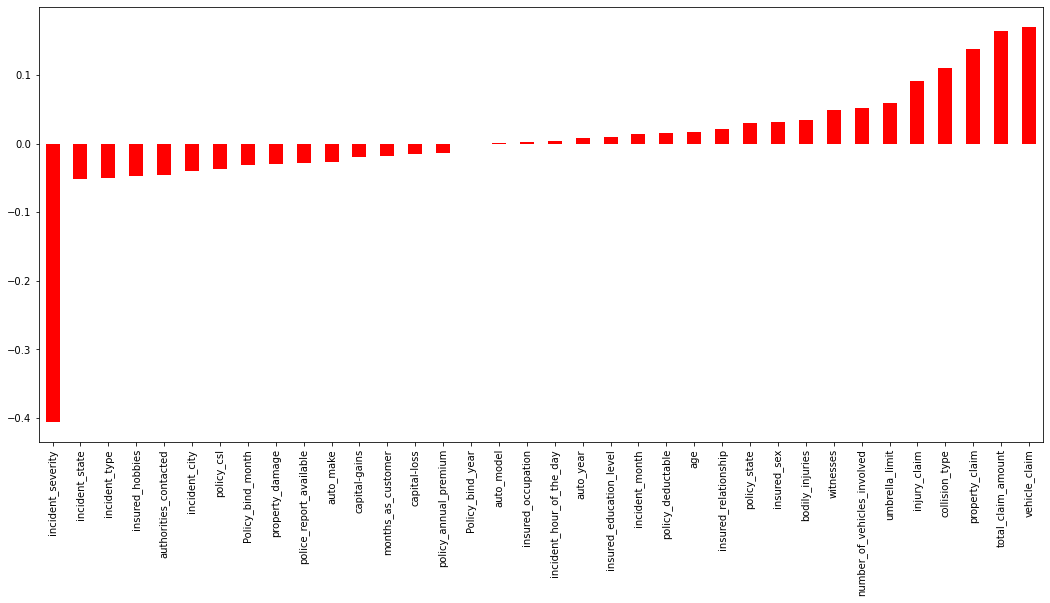

In [183]:
plt.figure(figsize=[18,8])
ic.corr()['fraud_reported'].sort_values().drop(['fraud_reported']).plot(kind='bar',color='r')

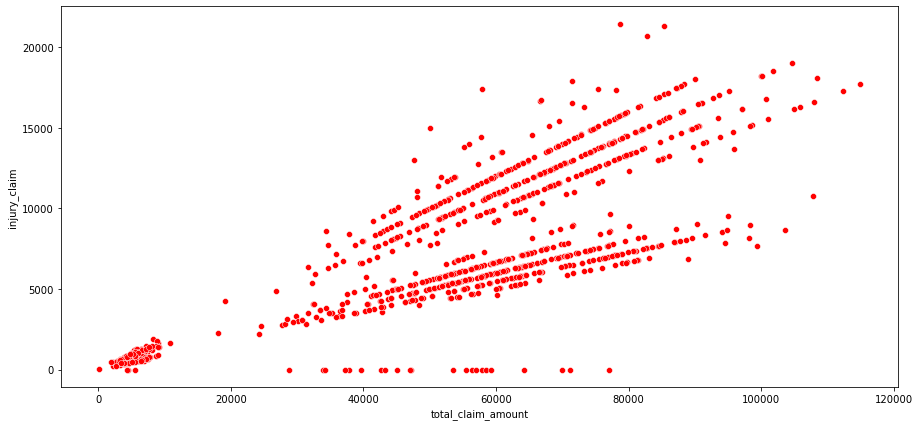

In [184]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="total_claim_amount", y='injury_claim', data=ic,color='r')
plt.show()

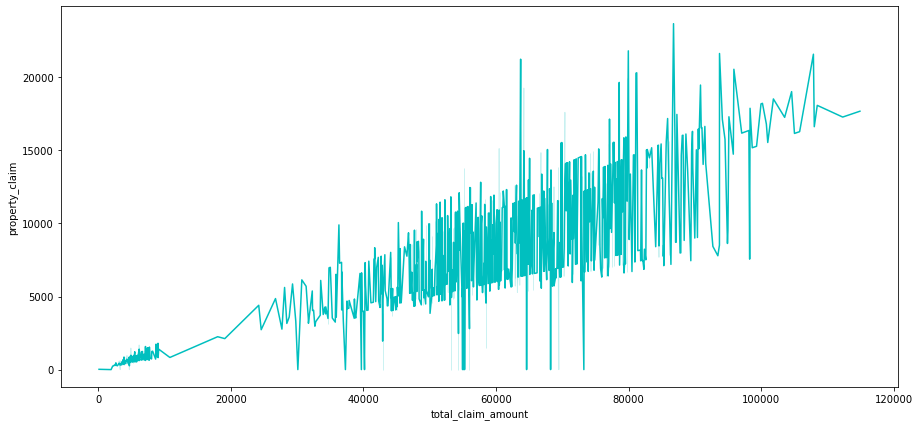

In [185]:
plt.figure(figsize=(15,7))
sns.lineplot(x="total_claim_amount", y='property_claim', data=ic,color='c')
plt.show()

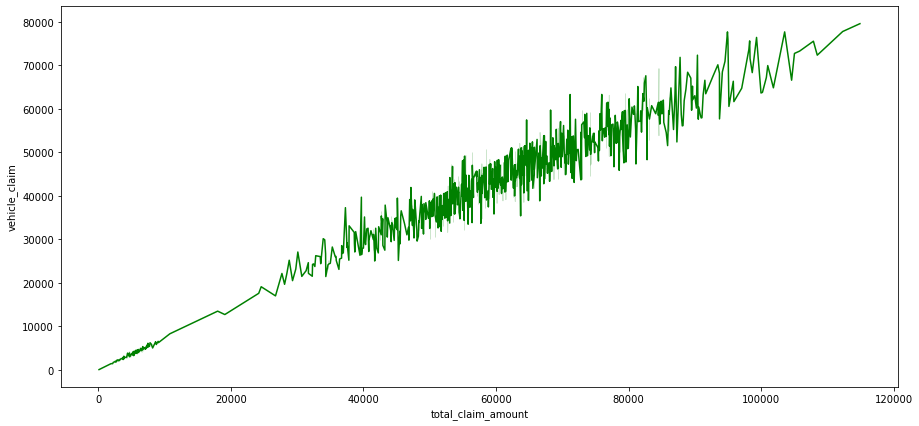

In [186]:
plt.figure(figsize=(15,7))
sns.lineplot(x="total_claim_amount", y='vehicle_claim', data=ic,color='g')
plt.show()

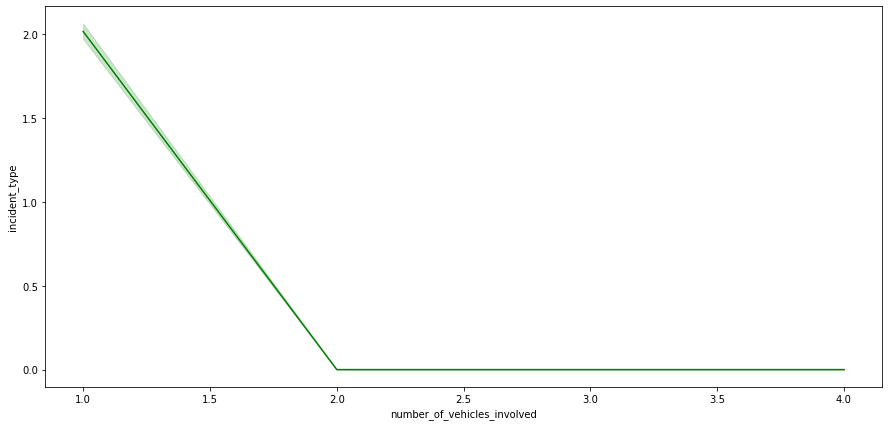

In [187]:
plt.figure(figsize=(15,7))
sns.lineplot(x="number_of_vehicles_involved", y='incident_type', data=ic,color='g')
plt.show()

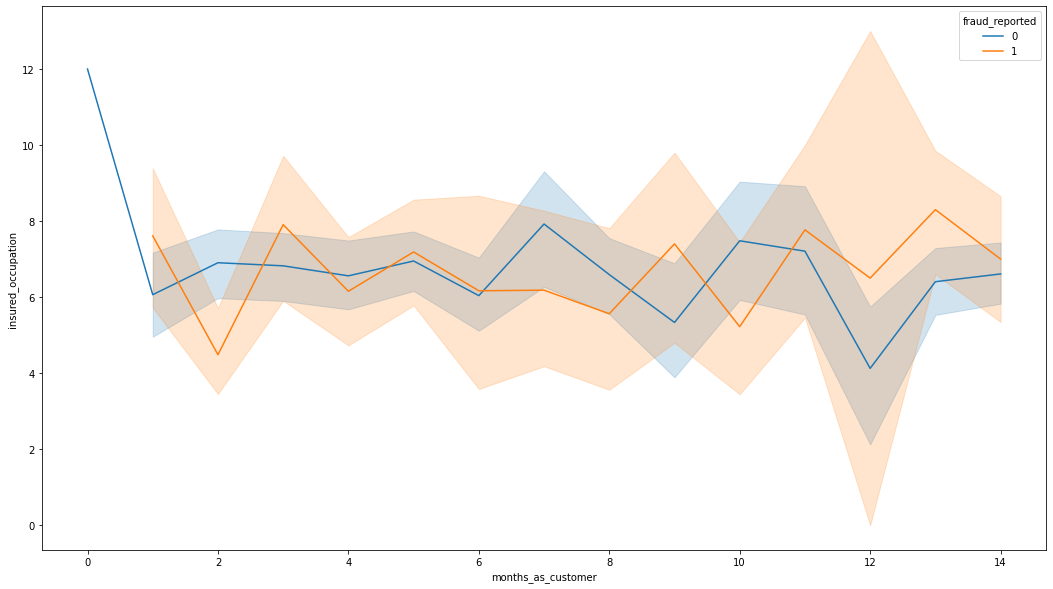

In [188]:
plt.figure(figsize=(18,10))
sns.lineplot(x="months_as_customer", y="insured_occupation", hue='fraud_reported', data=ic)
plt.show()

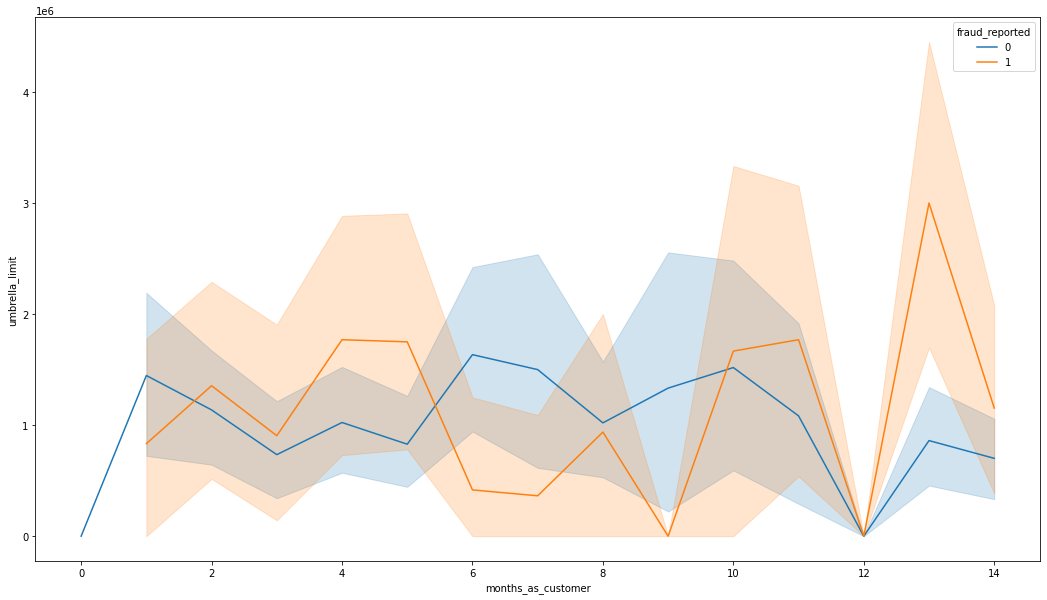

In [189]:
plt.figure(figsize=(18,10))
sns.lineplot(x="months_as_customer", y="umbrella_limit", hue='fraud_reported', data=ic)
plt.show()

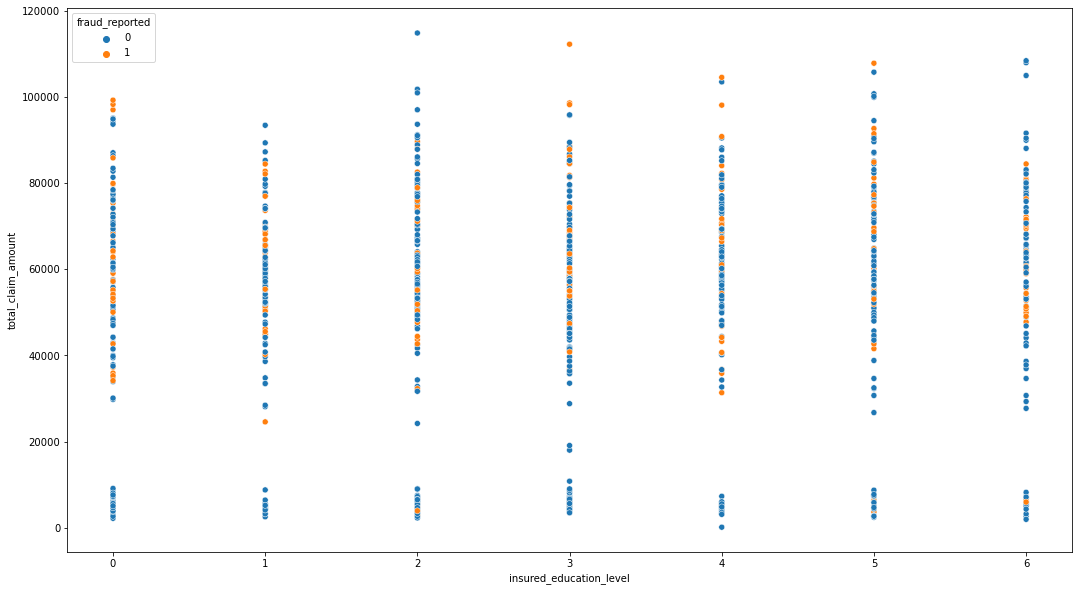

In [190]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="insured_education_level", y="total_claim_amount", hue='fraud_reported', data=ic)
plt.show()

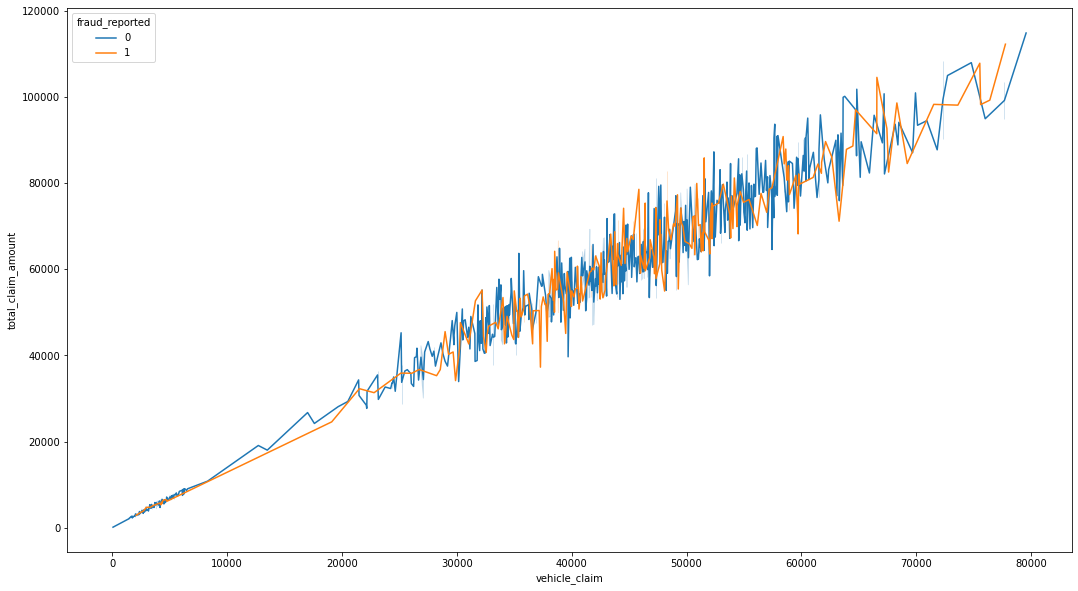

In [191]:
plt.figure(figsize=(18,10))
sns.lineplot(x="vehicle_claim", y="total_claim_amount", hue='fraud_reported', data=ic)
plt.show()

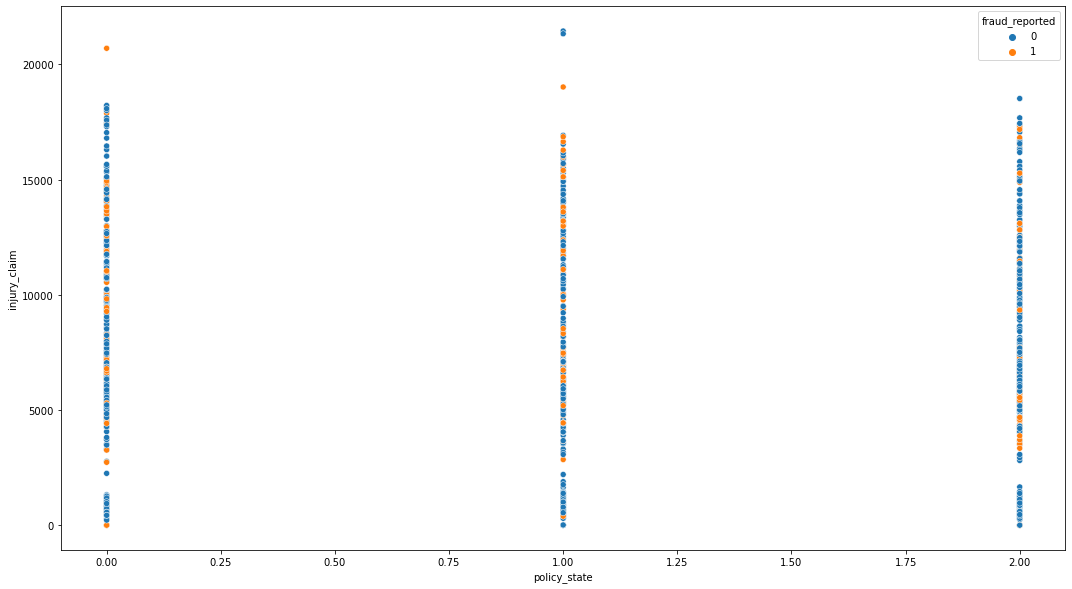

In [192]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="policy_state", y="injury_claim", hue='fraud_reported', data=ic)
plt.show()

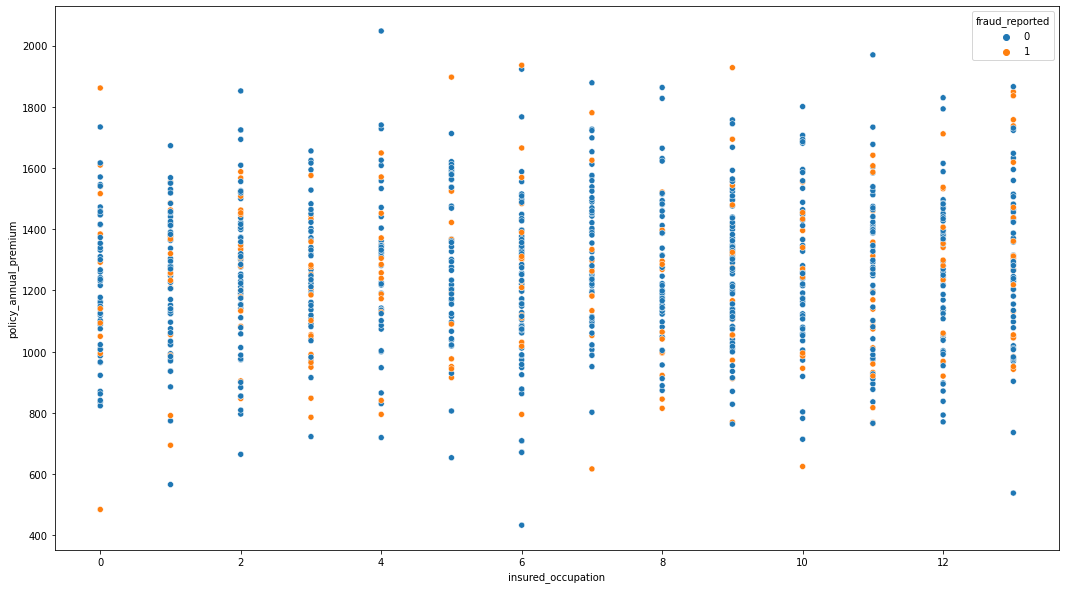

In [193]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="insured_occupation", y="policy_annual_premium", hue='fraud_reported', data=ic)
plt.show()

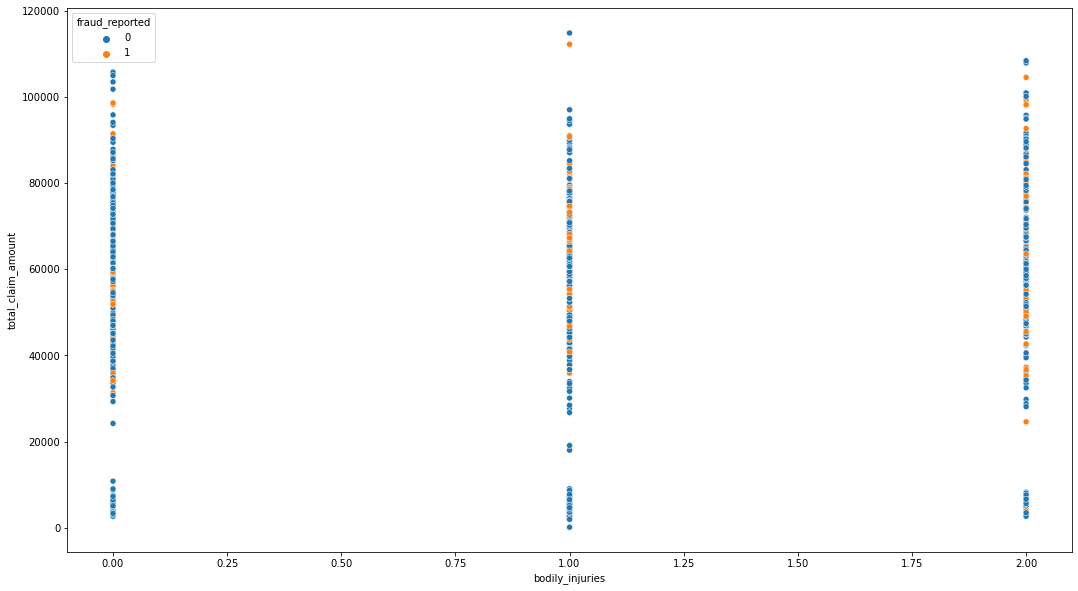

In [194]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="bodily_injuries", y="total_claim_amount", hue='fraud_reported', data=ic)
plt.show()

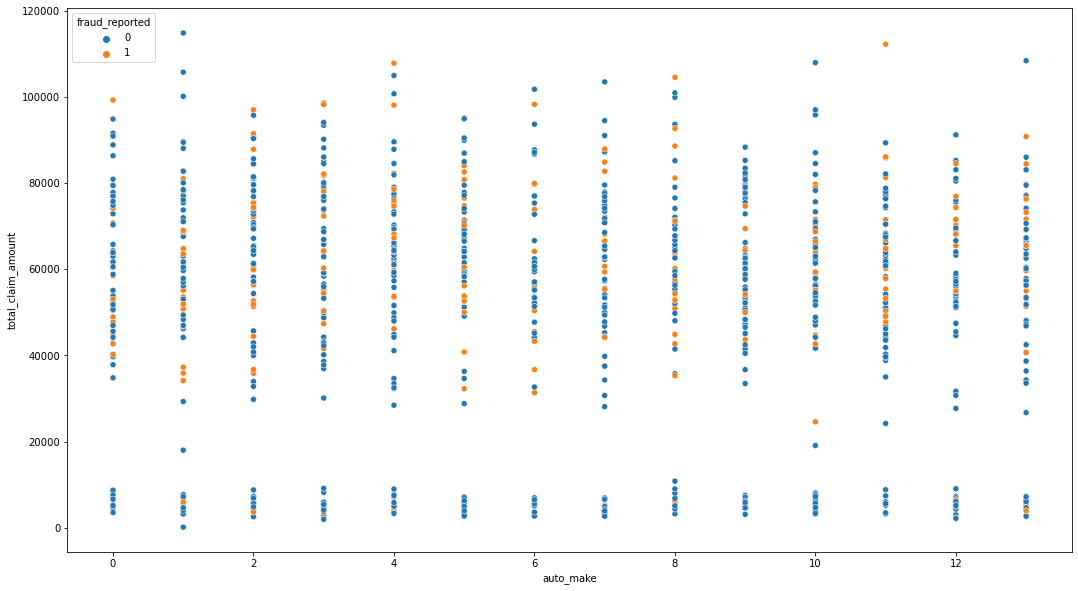

In [196]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="auto_make", y="total_claim_amount", hue='fraud_reported', data=ic)
plt.show()

### Observation-6

From the above observations we can conclude that...

1) In our data set no column is making a strong bond with the target colum.

2) Vehicle_claim, total_claim_amount, property_claim, collision_type, injury_claim, umberela_limit, numbers_of_vehicle_involved, witness, badly_injuries, insured_sex, policy_state and insured_relationship and age column making a positive correlation with the target column.

3) Incident_sevenrity, incident_state, incident_type, insured_hobbies, incident_city, policy_csl, policy_bind_month, property_damage, police_report_avilable and auto_makeand capital_gain columns have the negative correlation with the target columns.

4) policy_annual_premimum, capital_loss, policy_bind_year, incident_hour_of_the_day, auto_year, insured_education_level columns have zero correlation with the target column. 

5) As we can see the total_claim_amount and property claim graph,both the columns are directly proportinoanl to each each other means if one increases another one also increases.

6) Total_claim_amount and injuri_claim columns are making positive relation with each other.

7) vehicle claim and total_claim_amount will increases in the same direction means both are positivly correleted with each other.

## Data Preprocessing

In [198]:
y=ic['fraud_reported']

In [199]:
ic.drop(['fraud_reported'],inplace=True,axis=1)

In [200]:
x=ic

In [201]:
x.shape

(1000, 36)

In [202]:
y.shape

(1000,)

In [203]:
col=x.columns

## Removing Outliers

In [204]:
from scipy.stats import zscore

In [205]:
z=np.abs(zscore(x))
z.shape

(1000, 36)

In [206]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 368, 430, 458, 500,
       503, 657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  1,  6,  6, 28,  6,  6,  6,  5,
       13,  6,  6,  6], dtype=int64))


In [207]:
x=x[(z<3).all(axis=1)]

In [208]:
y=y[(z<3).all(axis=1)]

In [209]:
x.shape

(979, 36)

In [211]:
y.shape

(979,)

In [212]:
Data_loss=((1000-979)/1000)*100

In [213]:
print('Data loss is ',Data_loss,'%')

Data loss is  2.1 %


### We have removed the outliers and lost our 2.1% data which is less than 10% So we can continue with this 

## Removing Skewness

In [214]:
from sklearn.preprocessing import power_transform

In [215]:
x=power_transform(x,method='yeo-johnson')

In [216]:
x=pd.DataFrame(x,columns=col)

In [217]:
x.skew()

months_as_customer            -0.056054
age                           -0.029586
policy_state                  -0.150759
policy_csl                    -0.096635
policy_deductable              0.022269
policy_annual_premium         -0.007449
umbrella_limit                -7.925365
insured_sex                    0.137407
insured_education_level       -0.187775
insured_occupation            -0.238753
insured_hobbies               -0.248429
insured_relationship          -0.159794
capital-gains                  0.029315
capital-loss                   0.086843
incident_type                 -0.094421
collision_type                -0.203510
incident_severity             -0.079734
authorities_contacted         -0.223069
incident_state                -0.256518
incident_city                 -0.181918
incident_hour_of_the_day      -0.258844
number_of_vehicles_involved    0.371217
property_damage               -0.093907
bodily_injuries               -0.134630
witnesses                     -0.151253


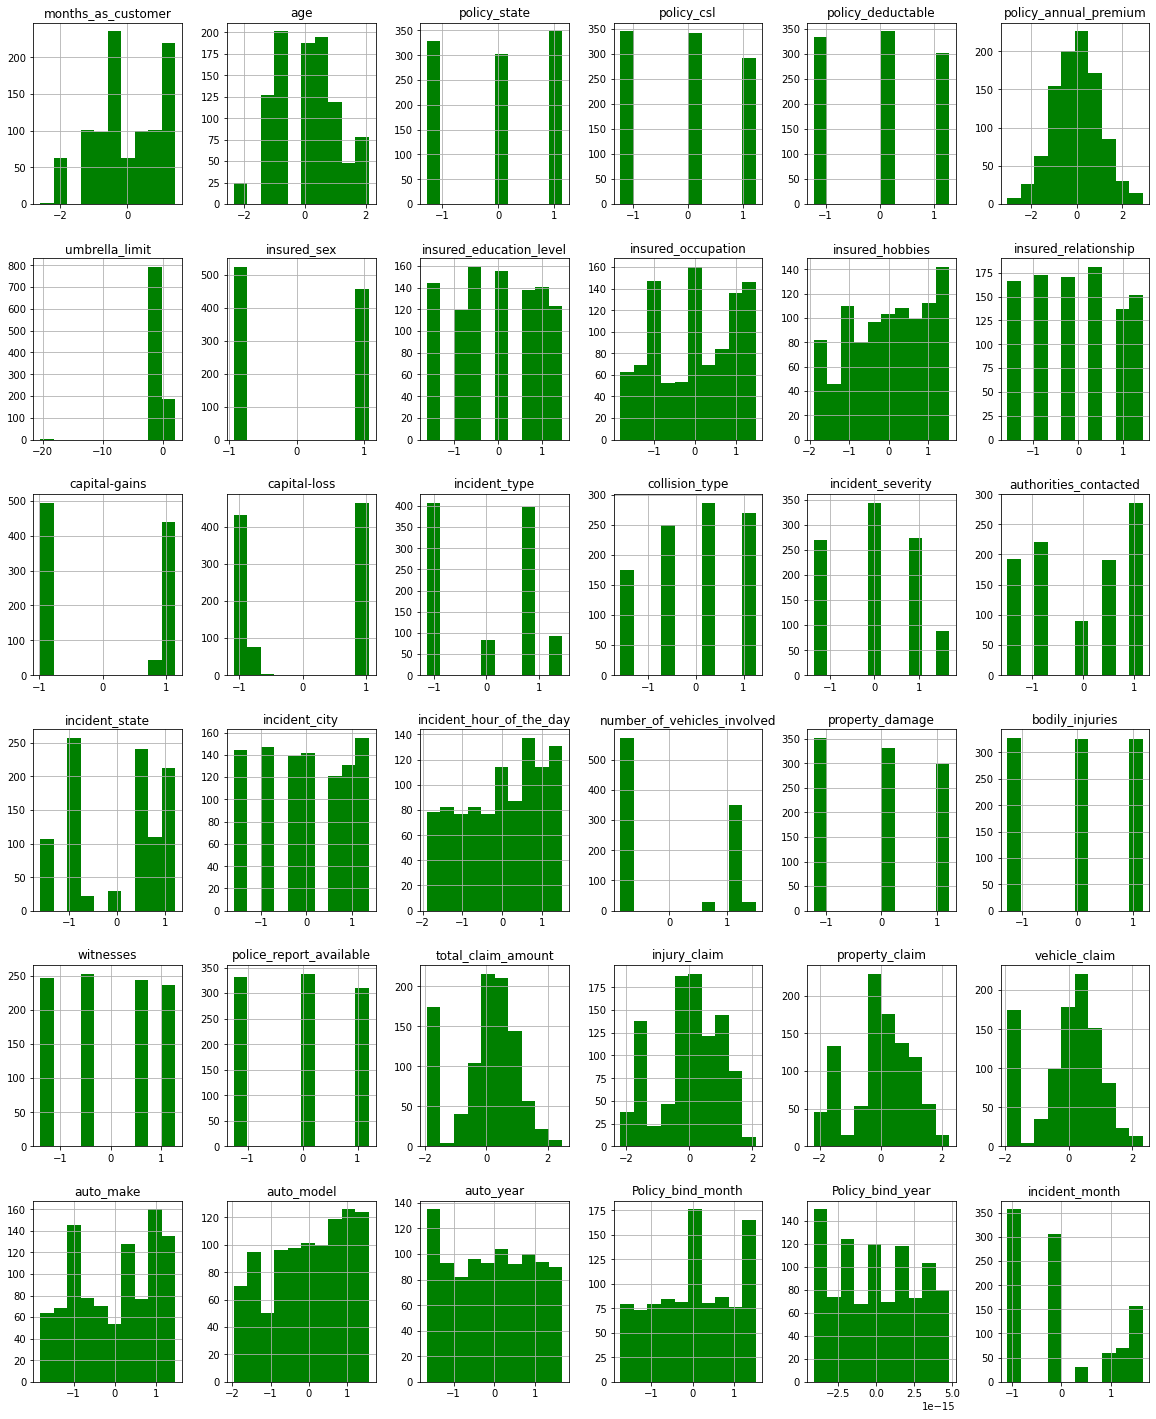

In [219]:
x.hist(figsize=[20,25],color='g')
plt.show()

## Data Scaling with Standard scaler

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
ss=StandardScaler()

In [223]:
x=ss.fit_transform(x)

In [224]:
x=pd.DataFrame(x,columns=col)

In [226]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_bind_month,Policy_bind_year,incident_month
0,0.238260,0.895472,1.140866,0.189432,0.063243,0.623352,-0.337333,1.070948,0.571851,-1.153930,1.224174,-1.564837,1.028008,1.047504,0.820592,1.253381,-1.368920,1.157912,0.399856,-0.941486,-0.918130,-0.840096,1.221124,0.092773,0.524188,1.205602,0.719628,0.008087,1.089600,0.757582,0.853972,-1.807104,-0.202837,1.001067,1.681020,-1.101611
1,-0.537000,0.424174,0.059221,0.189432,1.271193,-0.241371,1.481643,1.070948,0.571851,-0.088194,0.917901,-0.147232,-0.987616,1.047504,1.442044,-1.573566,-0.067115,1.157912,0.820068,0.977446,-0.449067,-0.840096,-1.219670,-1.266245,-1.405799,-1.256310,-1.777566,-1.521853,-1.562795,-1.786897,0.410269,-0.577061,0.297424,-0.105456,0.609055,-1.101611
2,1.432331,-1.413577,1.140866,-1.231186,1.271193,0.648887,1.481643,-0.933752,1.458212,1.056089,-1.399774,0.421084,0.953907,1.047504,-1.129261,0.318975,-0.067115,1.157912,-1.021342,-0.941486,-0.600402,1.193803,0.194573,1.177356,1.292018,0.131846,-0.715621,0.225606,-0.581068,-0.819862,-0.567456,0.951737,0.297424,-0.105456,-0.210683,-0.023566
3,-0.247291,0.424174,-1.265139,0.189432,1.271193,0.659541,1.787583,-0.933752,1.458212,-1.464447,-1.399774,0.940183,1.012746,-1.007174,0.820592,-0.622107,-1.368920,1.157912,-0.511086,-1.603627,-0.918130,-0.840096,-1.219670,0.092773,0.524188,0.131846,0.394711,-0.024361,-0.035470,0.681337,-0.840620,1.258234,1.495611,-0.402475,-1.576913,1.556820
4,-0.537000,0.424174,-1.265139,1.232785,0.063243,1.345630,1.787583,1.070948,-1.626104,1.056089,-1.399774,0.940183,1.065822,-0.942735,1.442044,-1.573566,-0.067115,-0.030924,-1.021342,-1.603627,1.143967,-0.840096,0.194573,-1.266245,-0.346875,0.131846,-1.730319,-1.300412,-1.627389,-1.740266,-1.816917,1.029185,0.635312,-0.105456,1.681020,-0.023566


## VIF
### Variance inflation factor

In [229]:
import statsmodels.api as si
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [233]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [234]:
vif(x)

,Variables,VIF Factor
0,months_as_customer,1.045787
1,age,1.043252
2,policy_state,1.037167
3,policy_csl,1.037956
4,policy_deductable,1.048759
5,policy_annual_premium,1.039483
6,umbrella_limit,1.041633
7,insured_sex,1.030287
8,insured_education_level,1.044043
9,insured_occupation,1.018163


As we can see the vif factor of total_claim_amount(261.74) colum and vechicle_claim(135.5) column are high it means both columns represent the same information, That is why we can drop total_claim_amount column.

In [235]:
x.drop(['total_claim_amount'],axis=1,inplace=True)

In [236]:
vif(x)

,Variables,VIF Factor
0,months_as_customer,1.042416
1,age,1.041559
2,policy_state,1.037086
3,policy_csl,1.034523
4,policy_deductable,1.048746
5,policy_annual_premium,1.033893
6,umbrella_limit,1.039861
7,insured_sex,1.028396
8,insured_education_level,1.043960
9,insured_occupation,1.015656


As we can see the vif factor of incident_type(10.35) colum and number_of_vehicles_involved(10.54) column are high it means both columns represent the same information, That is why we can drop number_of_vehicles_involved column.

In [237]:
x.drop(['number_of_vehicles_involved'],axis=1,inplace=True)

In [238]:
vif(x)

,Variables,VIF Factor
0,months_as_customer,1.031527
1,age,1.041553
2,policy_state,1.036061
3,policy_csl,1.034033
4,policy_deductable,1.047753
5,policy_annual_premium,1.033883
6,umbrella_limit,1.039861
7,insured_sex,1.024556
8,insured_education_level,1.043568
9,insured_occupation,1.014955


As we can see the vif factor of vechicle_claim colum and property claim column are high it means both columns represent the same information, That is why we can drop vechical_claim column.

In [241]:
x.drop(['vehicle_claim'],axis=1,inplace=True)

In [242]:
vif(x)

,Variables,VIF Factor
0,months_as_customer,1.031432
1,age,1.041391
2,policy_state,1.036015
3,policy_csl,1.033629
4,policy_deductable,1.043344
5,policy_annual_premium,1.033541
6,umbrella_limit,1.037401
7,insured_sex,1.021308
8,insured_education_level,1.043244
9,insured_occupation,1.014677


## Adopting SMOTE technique

In [243]:
from imblearn.over_sampling import SMOTE

In [244]:
st=SMOTE()

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

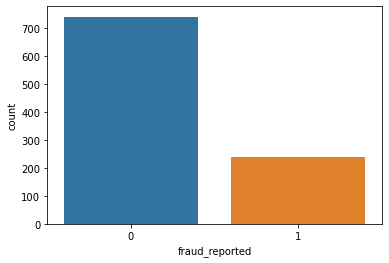

In [245]:
sns.countplot(y)

In [246]:
x,y=st.fit_resample(x,y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

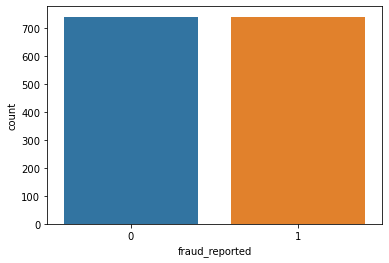

In [247]:
sns.countplot(y)

In [248]:
x.shape

(1480, 33)

In [249]:
y.shape

(1480,)

# Model learning phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target. Here we are going to use classification model because our target column is catagorical in nature.

For classification model, Some matrix we are going to find like:
    
    * Confusion matrix
    * Accuracu Score
    * Classification report
    

### Models

* Decision Tree classifier
* KNeighbors classifier
* Support vectod machine classifier
* Naive bayes classifier

### For bagging and boosting :

* Random Forest classifier
* AdaBoost classifier
* Gradient Boosting classifier
* XGboost classifier

In [256]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

## Creating a function for finding Best random state

In [264]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
        md=model()
        md.fit(x_train,y_train)
        pred=md.predict(x_test)
        ac_score=accuracy_score(y_test,pred)
        
        if ac_score>max_score:
            max_score=ac_score
            max_state=i
            
    print("Max accuracy is {} at random state {}".format(max_score,max_state))    

## Logistic Regression
Finding best random state by calling model_select function

In [265]:
model_select(LogisticRegression)

Max accuracy is 0.7760736196319018 at random state 59


In [266]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=59)

In [267]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  0.7760736196319018
[[123  40]
 [ 33 130]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       163
           1       0.76      0.80      0.78       163

    accuracy                           0.78       326
   macro avg       0.78      0.78      0.78       326
weighted avg       0.78      0.78      0.78       326



In [268]:
for i in range(12,20):
    cvs=cross_val_score(lr,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.7385097036454237
cross validation when cv = 13 --- 0.7378572366928212
cross validation when cv = 14 --- 0.7412527275060967
cross validation when cv = 15 --- 0.7365354222497079
cross validation when cv = 16 --- 0.7358578775128565
cross validation when cv = 17 --- 0.7398810621427254
cross validation when cv = 18 --- 0.7365233290887125
cross validation when cv = 19 --- 0.736465289096868


In [269]:
cvlr=14
Modellr=77.60
Cslr= 74.12
Diffrencelr= 77.60-74.12

### Kneighbors classifier
Finding best random state by calling model_select function

In [270]:
model_select(KNeighborsClassifier)

Max accuracy is 0.7484662576687117 at random state 16


In [271]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=16)

In [272]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7484662576687117
[[ 64  78]
 [  4 180]]
              precision    recall  f1-score   support

           0       0.94      0.45      0.61       142
           1       0.70      0.98      0.81       184

    accuracy                           0.75       326
   macro avg       0.82      0.71      0.71       326
weighted avg       0.80      0.75      0.73       326



In [273]:
for i in range(12,20):
    cvs=cross_val_score(knn,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.6933079814669115
cross validation when cv = 13 --- 0.6946186091505141
cross validation when cv = 14 --- 0.6905724553972531
cross validation when cv = 15 --- 0.6939737511166082
cross validation when cv = 16 --- 0.6953672861150071
cross validation when cv = 17 --- 0.6939501505931525
cross validation when cv = 18 --- 0.6933179873967413
cross validation when cv = 19 --- 0.6925793504740873


In [274]:
cvknn=16
Modelknn=74.84
Csknn= 69.53
Diffrenceknn= 74.84-69.53

### Naive bayes classifier
Finding best random state by calling model_select function

In [276]:
model_select(GaussianNB)

Max accuracy is 0.7822085889570553 at random state 46


In [279]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=46)

In [280]:
mn=GaussianNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7822085889570553
[[116  34]
 [ 37 139]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       150
           1       0.80      0.79      0.80       176

    accuracy                           0.78       326
   macro avg       0.78      0.78      0.78       326
weighted avg       0.78      0.78      0.78       326



In [281]:
for i in range(13,20):
    cvr=cross_val_score(mn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 13 --- 0.7243321032328951
Cross validation when cv= 14 --- 0.7236554999358233
Cross validation when cv= 15 --- 0.7196385624957052
Cross validation when cv= 16 --- 0.7203132304815334
Cross validation when cv= 17 --- 0.7209877681480116
Cross validation when cv= 18 --- 0.7210631142456002
Cross validation when cv= 19 --- 0.722295248611038


In [282]:
cvgn=13
Modelgnr=78.22
Csgn= 72.43
Diffrencegn= 78.22-72.43

### Decision tree classifier
Finding best random state by calling model_select function

In [283]:
model_select(DecisionTreeClassifier)

Max accuracy is 0.8957055214723927 at random state 96


In [284]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=96)

In [285]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8865030674846626
[[138  24]
 [ 13 151]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       162
           1       0.86      0.92      0.89       164

    accuracy                           0.89       326
   macro avg       0.89      0.89      0.89       326
weighted avg       0.89      0.89      0.89       326



In [286]:
for i in range(12,20):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8461513244164699
Cross validation when cv= 13 --- 0.8439742992607454
Cross validation when cv= 14 --- 0.8413554100885638
Cross validation when cv= 15 --- 0.8373118944547515
Cross validation when cv= 16 --- 0.8374021154745208
Cross validation when cv= 17 --- 0.8271098408015243
Cross validation when cv= 18 --- 0.8441407908054983
Cross validation when cv= 19 --- 0.8541195646458805


In [287]:
cvdtc=12
Modeldtc=88.65
Csdtc= 84.61
Diffrencedtc= 88.65-84.61

### Support vector classifier
Finding best random state by calling model_select function

In [288]:
model_select(SVC)

Max accuracy is 0.9171779141104295 at random state 68


In [289]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=68)

In [290]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9171779141104295
[[141  21]
 [  6 158]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       162
           1       0.88      0.96      0.92       164

    accuracy                           0.92       326
   macro avg       0.92      0.92      0.92       326
weighted avg       0.92      0.92      0.92       326



In [291]:
for i in range(12,20):
    cvr=cross_val_score(sv,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8832721391730045
Cross validation when cv= 13 --- 0.8838331362784088
Cross validation when cv= 14 --- 0.8839173405211141
Cross validation when cv= 15 --- 0.8846148560434275
Cross validation when cv= 16 --- 0.8853217040673211
Cross validation when cv= 17 --- 0.8858872702686089
Cross validation when cv= 18 --- 0.884652430861658
Cross validation when cv= 19 --- 0.8872005187794662


In [324]:
cvsv=19
Modelsv=91.71
Csdsv= 88.72
Diffrencesv= 91.71-88.72

## Ensamble technique --

### Bagging and boosting

## Random forest classifier
Finding best random state by calling model_select function

In [297]:
model_select(RandomForestClassifier)

Max accuracy is 0.9294478527607362 at random state 85


In [298]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=85)

In [299]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9202453987730062
[[144  13]
 [ 13 156]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       157
           1       0.92      0.92      0.92       169

    accuracy                           0.92       326
   macro avg       0.92      0.92      0.92       326
weighted avg       0.92      0.92      0.92       326



In [300]:
for i in range(12,20):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8847637468310167
Cross validation when cv= 13 --- 0.8845258141951202
Cross validation when cv= 14 --- 0.8819471184700296
Cross validation when cv= 15 --- 0.8786160929018071
Cross validation when cv= 16 --- 0.8807123655913978
Cross validation when cv= 17 --- 0.8798558608396336
Cross validation when cv= 18 --- 0.8821138211382115
Cross validation when cv= 19 --- 0.8851674641148325


In [301]:
cvrf=19
Modelrf= 92.02
Csrf= 88.51
Diffrencerf =92.02-88.51

### AdaBoostClassifier
Finding best random state by calling model_select function

In [302]:
model_select(AdaBoostClassifier)

Max accuracy is 0.911042944785276 at random state 19


In [303]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=19)

In [304]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.911042944785276
[[151  11]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       162
           1       0.93      0.89      0.91       164

    accuracy                           0.91       326
   macro avg       0.91      0.91      0.91       326
weighted avg       0.91      0.91      0.91       326



In [305]:
for i in range(14,20):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 14 --- 0.8617379027082531
Cross validation when cv= 15 --- 0.8576788291074007
Cross validation when cv= 16 --- 0.8611938990182328
Cross validation when cv= 17 --- 0.8609164669002398
Cross validation when cv= 18 --- 0.8558298233584745
Cross validation when cv= 19 --- 0.8602274918064391


In [306]:
cvada=14
Modelada = 91.10
Csada= 86.17
Diffrenceada=91.10-86.17

### GradientBoostingClassifier
Finding best random state by calling model_select function

In [307]:
model_select(GradientBoostingClassifier)

Max accuracy is 0.9386503067484663 at random state 19


In [308]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=19)

In [309]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9386503067484663
[[147  15]
 [  5 159]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       162
           1       0.91      0.97      0.94       164

    accuracy                           0.94       326
   macro avg       0.94      0.94      0.94       326
weighted avg       0.94      0.94      0.94       326



In [310]:
for i in range(12,20):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8873754261736165
Cross validation when cv= 13 --- 0.8899119821336868
Cross validation when cv= 14 --- 0.8839301758439226
Cross validation when cv= 15 --- 0.8873359444788016
Cross validation when cv= 16 --- 0.8880756194483403
Cross validation when cv= 17 --- 0.8838665560267994
Cross validation when cv= 18 --- 0.889370490090443
Cross validation when cv= 19 --- 0.8919326287747341


In [311]:
cvgbc=19
Modelgbc = 93.86
Csgbc= 89.19
Diffrencegbc =93.86-89.19

## Xg boost Classifier
Finding best random state by calling model_select function

In [314]:
model_select(xg.XGBClassifier)

Max accuracy is 0.9386503067484663 at random state 11


In [315]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=11)

In [317]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print("Accuracy ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  0.9386503067484663
[[168  13]
 [  7 138]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       181
           1       0.91      0.95      0.93       145

    accuracy                           0.94       326
   macro avg       0.94      0.94      0.94       326
weighted avg       0.94      0.94      0.94       326



In [319]:
for i in range(12,20):
    cvr=cross_val_score(xb,x,y,cv=i)
    print("Cross validation when cv =",cvr.mean())

Cross validation when cv = 0.8995104467173705
Cross validation when cv = 0.8987137687650032
Cross validation when cv = 0.8981260428699782
Cross validation when cv = 0.8974713117570262
Cross validation when cv = 0.8968413978494624
Cross validation when cv = 0.9007314524555904
Cross validation when cv = 0.8941293629803767
Cross validation when cv = 0.8953327374380006


In [320]:
cvxg=15
Modelxg=93.86
Csxg=90.07
Diffrencexg=93.86-90.07

## Comparison of all the models

In [328]:
kk={'CV':[cvlr,cvknn,cvgn,cvdtc,cvsv,cvrf,cvada,cvgbc,cvxg],
                 'Model_accuracy':[Modellr,Modelknn,Modelgnr,Modeldtc,Modelsv,Modelrf,Modelada,Modelgbc,Modelxg],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdtc,Csdsv,Csrf,Csada,Csgbc,Csxg],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedtc,Diffrencesv,Diffrencerf,Diffrenceada,Diffrencegbc,Diffrencexg]
 }

In [329]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GaussianNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','GredientBoosting','XGBoost'])

In [330]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,14,77.60,74.12,3.48
kneighbour,16,74.84,69.53,5.31
GaussianNB,13,78.22,72.43,5.79
Decision tree,12,88.65,84.61,4.04
Support vector machine,19,91.71,88.72,2.99
Random forest,19,92.02,88.51,3.51
Adaboost,14,91.10,86.17,4.93
GredientBoosting,19,93.86,89.19,4.67
XGBoost,15,93.86,90.07,3.79


In [342]:
aa=list(result['Cross validation Score'])

In [343]:
bb=list(result.index)

In [344]:
kk=pd.DataFrame({'Model':bb,'Score':aa},index=[1,2,3,4,5,6,7,8,9])

In [345]:
kk

,Model,Score
1,Logistic,74.12
2,kneighbour,69.53
3,GaussianNB,72.43
4,Decision tree,84.61
5,Support vector machine,88.72
6,Random forest,88.51
7,Adaboost,86.17
8,GredientBoosting,89.19
9,XGBoost,90.07


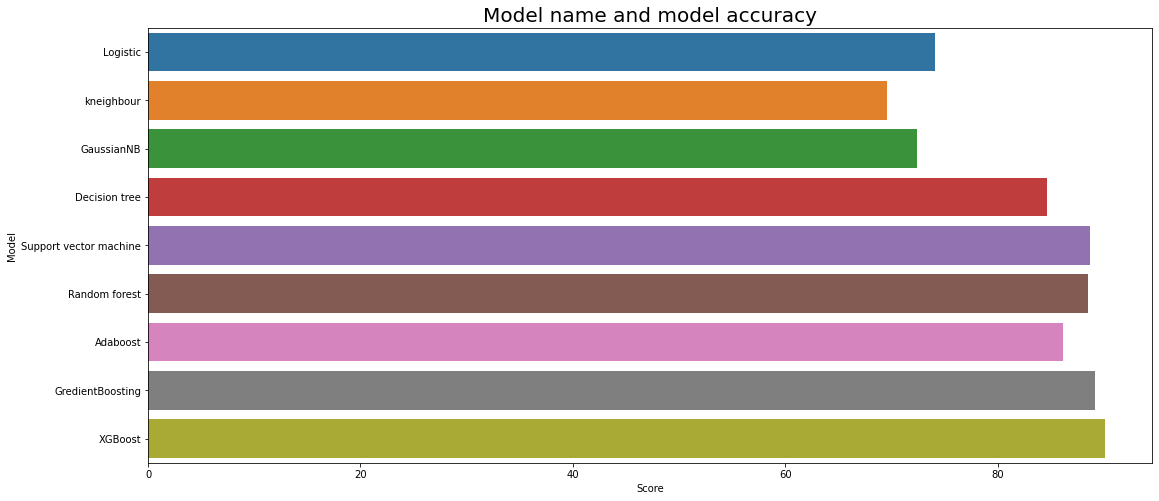

In [352]:
plt.figure(figsize=[18,8])
sns.barplot(data=kk,y='Model',x='Score')
plt.title("Model name and model accuracy",fontsize=20)
plt.show()

## Best Model
### We are chosing Support vector machine classifier as a best model, Because this model has least diffrence between, model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing SVC
### Model accuracy is : 91.71
### Cross_validation score : 88.72
### Diffrence : 2.99
.

.

## Hyper Parameter tuning
### Grid search cv

In [395]:
parameter=[{'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
           'cache_size':[200,300,400],
           }]

In [384]:
GSC=GridSearchCV(sv,parameter,cv=19)
GSC.fit(x_train,y_train)
GSC.best_params_

{'C': 10, 'cache_size': 200, 'gamma': 0.1, 'kernel': 'rbf'}

In [386]:
GSC.best_estimator_

SVC(C=10, gamma=0.1)

In [387]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.9539877300613497

In [424]:
sv=SVC(C=10, gamma=0.1,probability=False)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9539877300613497
[[177   4]
 [ 11 134]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       181
           1       0.97      0.92      0.95       145

    accuracy                           0.95       326
   macro avg       0.96      0.95      0.95       326
weighted avg       0.95      0.95      0.95       326



## We have done with Grid search CV and we got our best model Support vector machine classifier with 95.39% accuracy.

# Accuracy-95.39%

### AUC_ROC Curve

In [425]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [426]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [428]:
y_pred_prob

array([0.01993988, 0.12069172, 0.01226665, 0.9752374 , 0.9933469 ,
       0.08742595, 0.93238705, 0.13023533, 0.80307204, 0.02224874,
       0.03252693, 0.04001881, 0.05166457, 0.98758906, 0.9921619 ,
       0.8234885 , 0.06569929, 0.99037194, 0.9775424 , 0.9737273 ,
       0.14012295, 0.18263626, 0.98267704, 0.6135833 , 0.8923202 ,
       0.02640147, 0.07309103, 0.6905143 , 0.06987929, 0.11234013,
       0.96269107, 0.0097084 , 0.65909517, 0.9824504 , 0.98757523,
       0.8541623 , 0.9661148 , 0.24236894, 0.5368998 , 0.03463179,
       0.9914205 , 0.37831157, 0.9686809 , 0.99548775, 0.11072152,
       0.05863708, 0.9726318 , 0.10080729, 0.9531754 , 0.21330222,
       0.29577732, 0.1538733 , 0.7789479 , 0.99719363, 0.07710282,
       0.03474558, 0.07789437, 0.5347005 , 0.46062857, 0.1958987 ,
       0.98438567, 0.98341584, 0.7201717 , 0.49620274, 0.78896827,
       0.26248604, 0.6651619 , 0.0728376 , 0.6883932 , 0.5979077 ,
       0.6900447 , 0.41389358, 0.05835811, 0.9694037 , 0.69985

In [429]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

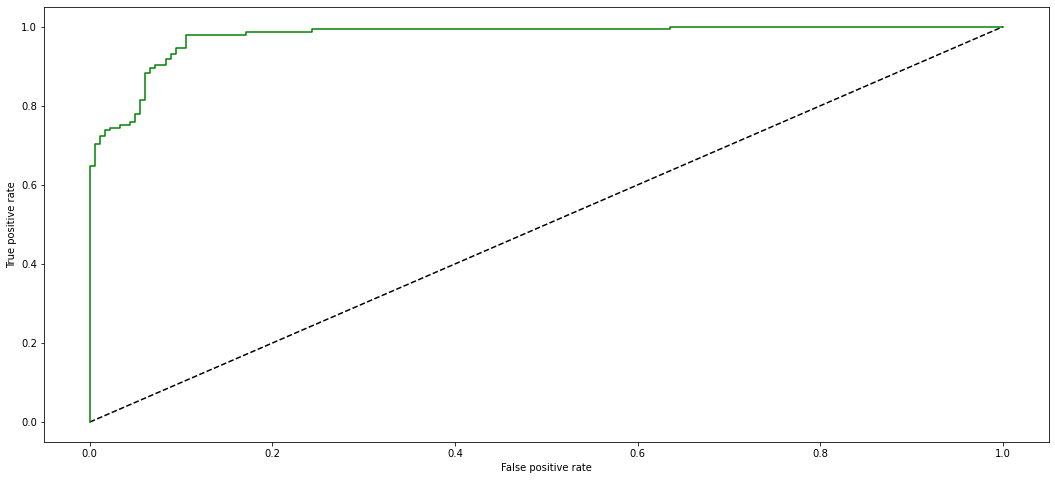

In [431]:
plt.figure(figsize=[18,8])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier',color='g')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [432]:
auc_roc=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))

In [433]:
print(auc_roc)

0.9171842255667746


#### AUC-ROC curve score is 91.71 %

## Prediction 

In [444]:
predict=sv.predict(x_test)[:]

In [445]:
original=y_test[:]

In [446]:
pd.DataFrame([predict,original],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325
Predict,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
Original,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0


## Saving the model

In [447]:
import joblib

In [448]:
joblib.dump(sv,'Insurance Claims.pkl')

['Insurance Claims.pkl']

# Conclusion

From the above observations we are concluding that

1. We had no null values in data set, So we did not adopt imputation technique.

2. In order to replace the object data to the int values we used encoading technique.

3. Some columns we dropped, because they was not more contributing to make prediction.

4. We have changed the format of months_as_customer column in the year format So that our machine can easily understand the inputs of this column.Same work we did with age column and devide the age column in the group format.

We used many classifier for building our best model -

like-

A. Linear regression

B. k nearest neighbour classifier

c. Design tree classifier

D. Support vector machine classifier

5. In order to control overfitting and underfitting we adopted Cross validation.

6. For Bagging and boosting we have used Random forest classifier,Adaboost classifier and Gradient boosting classifier and xgboost classifier.

7. we worked on Hyper parameter tuning on support vector machine for boosting our model accuracy.

Finally we got our best model Which is support vector machine classifier with 95.39 % accuracy.

We have ploted Auc-Roc curve and got 91.71 %. Auc-Roc curve score.


### Now our model is ready to predict with 95.39% accuracy 

## Model name- Support vector machine classifier
## Accuracy - 95.39 %